In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import glob
import tifffile
import json
import os

# Create fake images

In [151]:
files = glob.glob('../images/train/data/comet_*.mat')
metainfo = ['PolAng', 'TipProb', 'ExpTime', 'TipExp', 'eNoise']

In [152]:
def disp(stats, key):
    print(f'{key}: {np.min(stats[key]):.2f}-{np.max(stats[key]):.2f} {np.mean(stats[key]):.2f}')
    
def print_stats(files):
    values = []
    stats = {'MinPixel': [], 'MaxPixel': [], 'MeanPixel': []}
    min_int, max_int = [], []
    for file in files:
        src = loadmat(file, squeeze_me=True)
        im = src['M'][17:48, 17:48]
        values += im.ravel().tolist()
        stats['MinPixel'].append(im.min())
        stats['MaxPixel'].append(im.max())
        stats['MeanPixel'].append(im.mean())
        for key in metainfo:
            if key not in stats:
                stats[key] = []
            stats[key].append(src[key])
    
    for key in stats.keys():
        disp(stats, key)
    
    return values

In [153]:
vals = print_stats(files)

MinPixel: 60.00-139.00 107.77
MaxPixel: 364.00-1006.00 590.71
MeanPixel: 166.01-199.16 174.62
PolAng: 0.00-90.00 43.96
TipProb: 0.50-0.90 0.70
ExpTime: 250.00-400.00 326.09
TipExp: 200.00-350.00 273.80
eNoise: 100.00-250.00 176.51


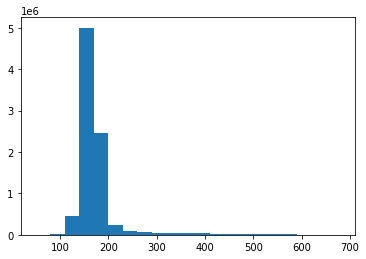

In [156]:
plt.hist(vals, bins=np.arange(50, 700, 30));

In [154]:
def save_tif(ifilename, ofilename, subpixel=0):
    src = loadmat(ifilename, squeeze_me=True)
    
    metadata = {}
    for key in metainfo:
        metadata[key] = src[key]

    extra_tags = [("MicroManagerMetadata", 's', 0, json.dumps(metadata), True)]
    
    tifffile.imwrite(
        ofilename,
        data=src['M'][:, :, subpixel],
        extratags=extra_tags,
    )

In [155]:
for ifile in files:
    for sp in range(9):
        subpixel = chr(sp+65)
        ofile = ifile.replace('data', f'data_{subpixel}').replace('.mat', '.tif')

        newpath = '/'.join(ofile.split('/')[:-1])
        if not os.path.exists(newpath):
            os.makedirs(newpath)

        # pad digits to 5 characters
        spl = ofile.split('_')
        ofile = '_'.join(spl[:-1]) + '_' + spl[-1].rjust(9, '0')

        save_tif(ifile, ofile, subpixel=ord(subpixel)-65)

In [4]:
def read_tif(filename):
    frames = tifffile.TiffFile(filename)
    page = frames.pages[0]
    metadata = page.tags["MicroManagerMetadata"].value
    return tifffile.imread(filename), metadata

In [164]:
images = glob.glob('../images/train/data_A/comet_*.tif')
img, meta = read_tif(images[0])
img.shape, meta

((65, 65),
 {'PolAng': 39,
  'TipProb': 0.685,
  'ExpTime': 363,
  'TipExp': 304,
  'eNoise': 124})

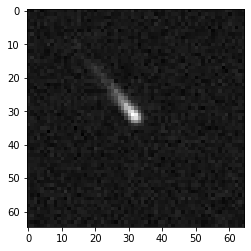

In [165]:
plt.imshow(img, cmap='gray');

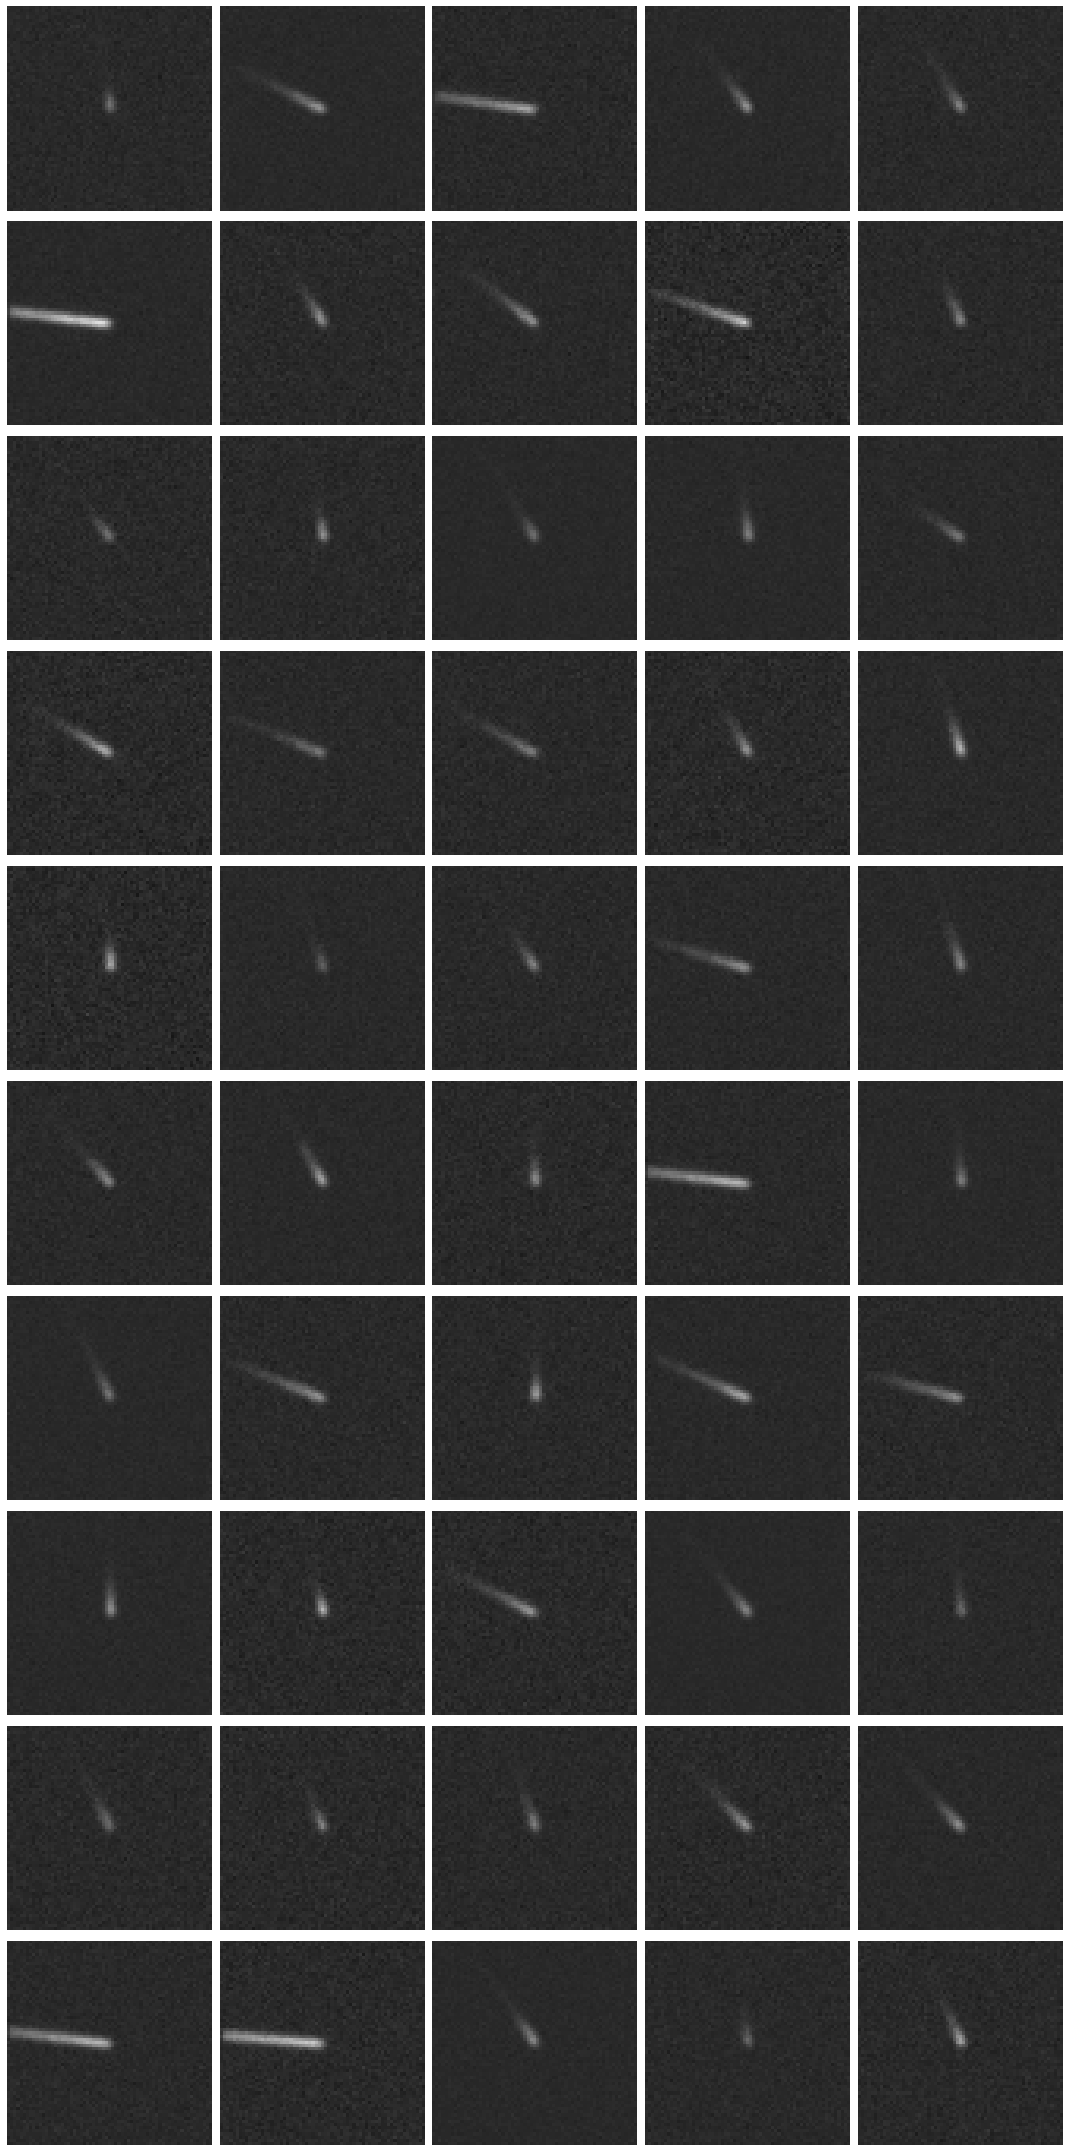

In [166]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

for i in range(10):
    for j in range(5):
        idx = np.random.randint(0, len(images))
        img, _ = read_tif(images[idx])
        ax[i, j].imshow(img, cmap='gray', vmin=0, vmax=1000)
        ax[i, j].axis('off')
        
plt.tight_layout();

# Noise

In [157]:
files = sorted(glob.glob('../images/train/data/noise_*.mat'))
metainfo = ['PolAng', 'PolDiam', 'TipProb', 'ExpTime', 'TipExp', 'eNoise', 'PhotSec']

In [159]:
def disp(stats, key):
    print(f'{key}: {np.min(stats[key]):.2f}-{np.max(stats[key]):.2f} {np.mean(stats[key]):.2f}')
    
def print_stats(files):
    values = []
    stats = {'MinPixel': [], 'MaxPixel': [], 'MeanPixel': []}
    min_int, max_int = [], []
    for file in files:
        src = loadmat(file, squeeze_me=True)
        im = src['M'][17:48, 17:48]
        values += im.ravel().tolist()
        stats['MinPixel'].append(im.min())
        stats['MaxPixel'].append(im.max())
        stats['MeanPixel'].append(im.mean())
        for key in metainfo:
            if key not in stats:
                stats[key] = []
            stats[key].append(src[key])
    
    for key in stats.keys():
        disp(stats, key)
    
    return values

In [160]:
noise_vals = print_stats(files)

MinPixel: 43.00-144.00 111.39
MaxPixel: 158.00-373.00 222.96
MeanPixel: 149.46-159.52 152.17
PolAng: 0.00-90.00 44.65
PolDiam: 25.00-250.00 137.25
TipProb: 0.05-0.35 0.20
ExpTime: 100.00-250.00 174.67
TipExp: 50.00-2499.00 1316.50
eNoise: 50.00-399.00 231.80
PhotSec: 50.00-300.00 180.39


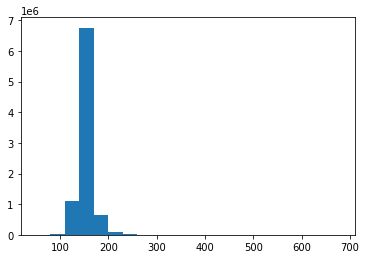

In [161]:
plt.hist(noise_vals, bins=np.arange(50, 700, 30));

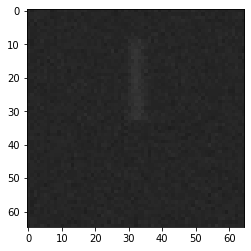

In [136]:
src = loadmat(np.random.choice(files), squeeze_me=True)
plt.imshow(src['M'][:,:,0],cmap='gray', vmin=0, vmax=1000);

In [137]:
for ifile in files:
    for sp in range(9):
        subpixel = chr(sp+65)
        ofile = ifile.replace('data', f'data_{subpixel}').replace('.mat', '.tif')

        newpath = '/'.join(ofile.split('/')[:-1])
        if not os.path.exists(newpath):
            os.makedirs(newpath)

        # pad digits to 5 characters
        spl = ofile.split('_')
        ofile = '_'.join(spl[:-1]) + '_' + spl[-1].rjust(9, '0')

        save_tif(ifile, ofile, subpixel=ord(subpixel)-65)

In [162]:
images = glob.glob('../images/val/data_A/noise_*.tif')
img, meta = read_tif(images[0])
img.shape, meta

((65, 65),
 {'PolAng': 87,
  'PolDiam': 136,
  'TipProb': 0.216,
  'ExpTime': 236,
  'TipExp': 1068,
  'eNoise': 298,
  'PhotSec': 87})

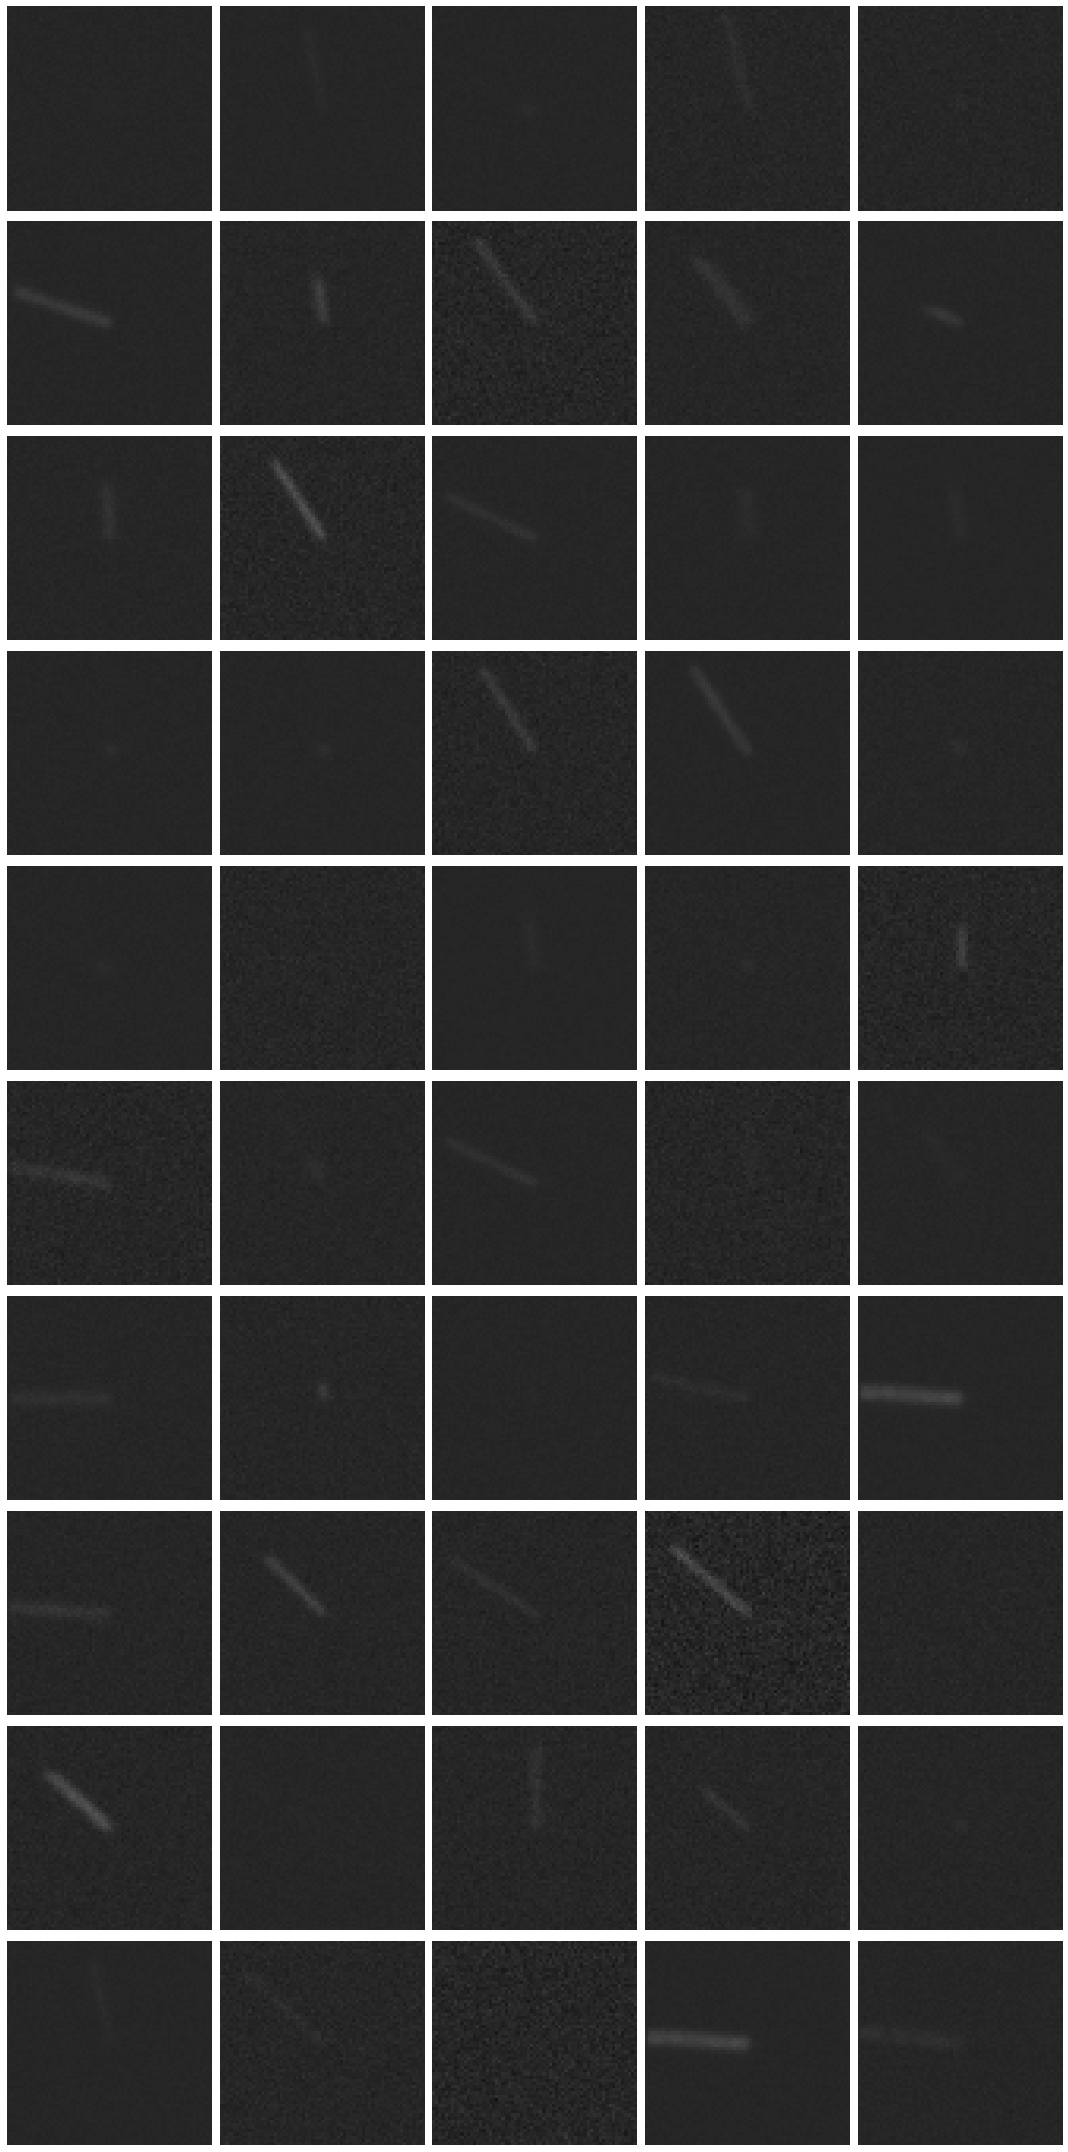

In [163]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

for i in range(10):
    for j in range(5):
        idx = np.random.randint(0, len(images))
        img, _ = read_tif(images[idx])
        ax[i, j].imshow(img, cmap='gray', vmin=0, vmax=1000)
        ax[i, j].axis('off')
        
plt.tight_layout();

# Augmentation

In [237]:
import cv2

In [238]:
images = glob.glob('../images/val/data_C/comet_*.tif')
idx = np.random.randint(0, len(images))
img, meta = read_tif(images[idx])
img.shape, meta

((65, 65),
 {'PolAng': 41,
  'TipProb': 0.734,
  'ExpTime': 305,
  'TipExp': 291,
  'eNoise': 221})

In [239]:
def plot_io(img, point):
    im = np.expand_dims(img, axis=0)
    im = np.vstack([im, im, im]).transpose((1, 2, 0))
    im = im / 1000
    im[point] = [0, 0, 1]
    
    plt.imshow(im)
    plt.axis('off')

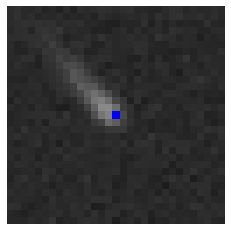

In [240]:
size = img.shape[0]
imgc = img[17:48, 17:48]
x, y = size//2 - 17, size//2 - 17
plot_io(imgc, (x, y))

### flip

In [241]:
def flip(img, point, subpixel=None, mode=0):
    # mode 0: horizontal flip, 1: vertical flip, 2: diagonal flip
    # TODO: incorporate subpixel
    h, w = img.shape
    if mode == 0:
        flip = cv2.flip(img, 1)
        point = (point[0], w-point[1]-1)
    elif mode == 1:
        flip = cv2.flip(img, 0)
        point = (h-point[0]-1, point[1])
    else:
        flip = cv2.flip(cv2.flip(img, 1), 0)
        point = (h-point[0]-1, w-point[1]-1)
    return flip, point #, subpixel

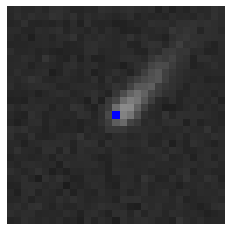

In [242]:
# flip horizontal
plot_io(*flip(imgc, (x, y), mode=0))

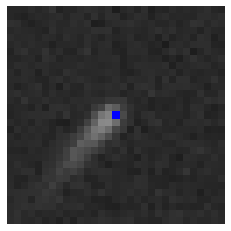

In [243]:
# flip vertical
plot_io(*flip(imgc, (x, y), mode=1))

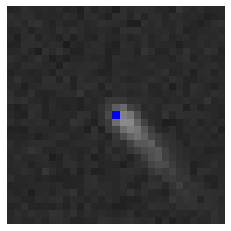

In [244]:
# flip diagonal
plot_io(*flip(imgc, (x, y), mode=2))

### crop

In [252]:
def crop(img, point, size=31):
    sizeo = len(img)
    pad = 5
    starti, startj = np.random.randint(pad, sizeo-size-(pad*2), size=2)
    
    imgc = img[starti:starti+size, startj:startj+size]
    
#     starti, startj = np.random.randint(0, 10, size=2)
#     endi, endj = np.random.randint(18, 28, size=2)
    
#     imgc = np.clip((0.5 + np.random.random(img.shape)) * img.mean(), img.min(), img.mean()) #np.zeros_like(img) + img.mean()
#     h, w = endi - starti, endj - startj
#     imgc[:h, :w] = img[starti:endi, startj:endj]
    
    return imgc, (point[0] - starti, point[1] - startj)

In [246]:
plot_io(*crop(img, (32, 32)))

IndexError: index 32 is out of bounds for axis 0 with size 31

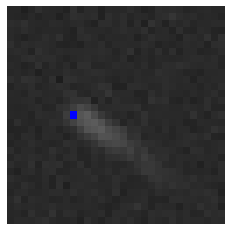

In [15]:
imgc, p = crop(img, (32, 32))
plot_io(*flip(imgc, p, mode=2))

## overlap

In [23]:
def get_image():
    images = glob.glob('../images/val/data_C/comet_*.tif')
    idx = np.random.randint(0, len(images))
    img, meta = read_tif(images[idx])
    return img

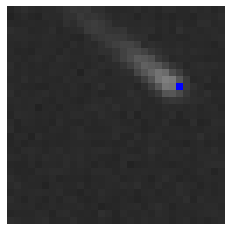

In [140]:
imgc, p = crop(get_image(), (32, 32))
mode1, mode2 = np.random.choice(3, replace=False, size=2)
if np.random.random() < 0.75:
    img1, p1 = flip(imgc, p, mode=mode1)
else:
    img1, p1 = imgc, p
plot_io(img1, p1)

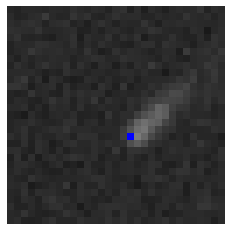

In [141]:
imgc, p = crop(get_image(), (32, 32))
img2, p2 = flip(imgc, p, mode=mode2)
plot_io(img2, p2)

685

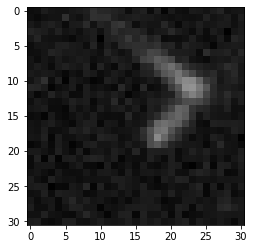

In [142]:
comb = np.clip(img1+img2, 0, 1000)
plt.imshow(comb, cmap='gray', vmax=1000)
comb.max()

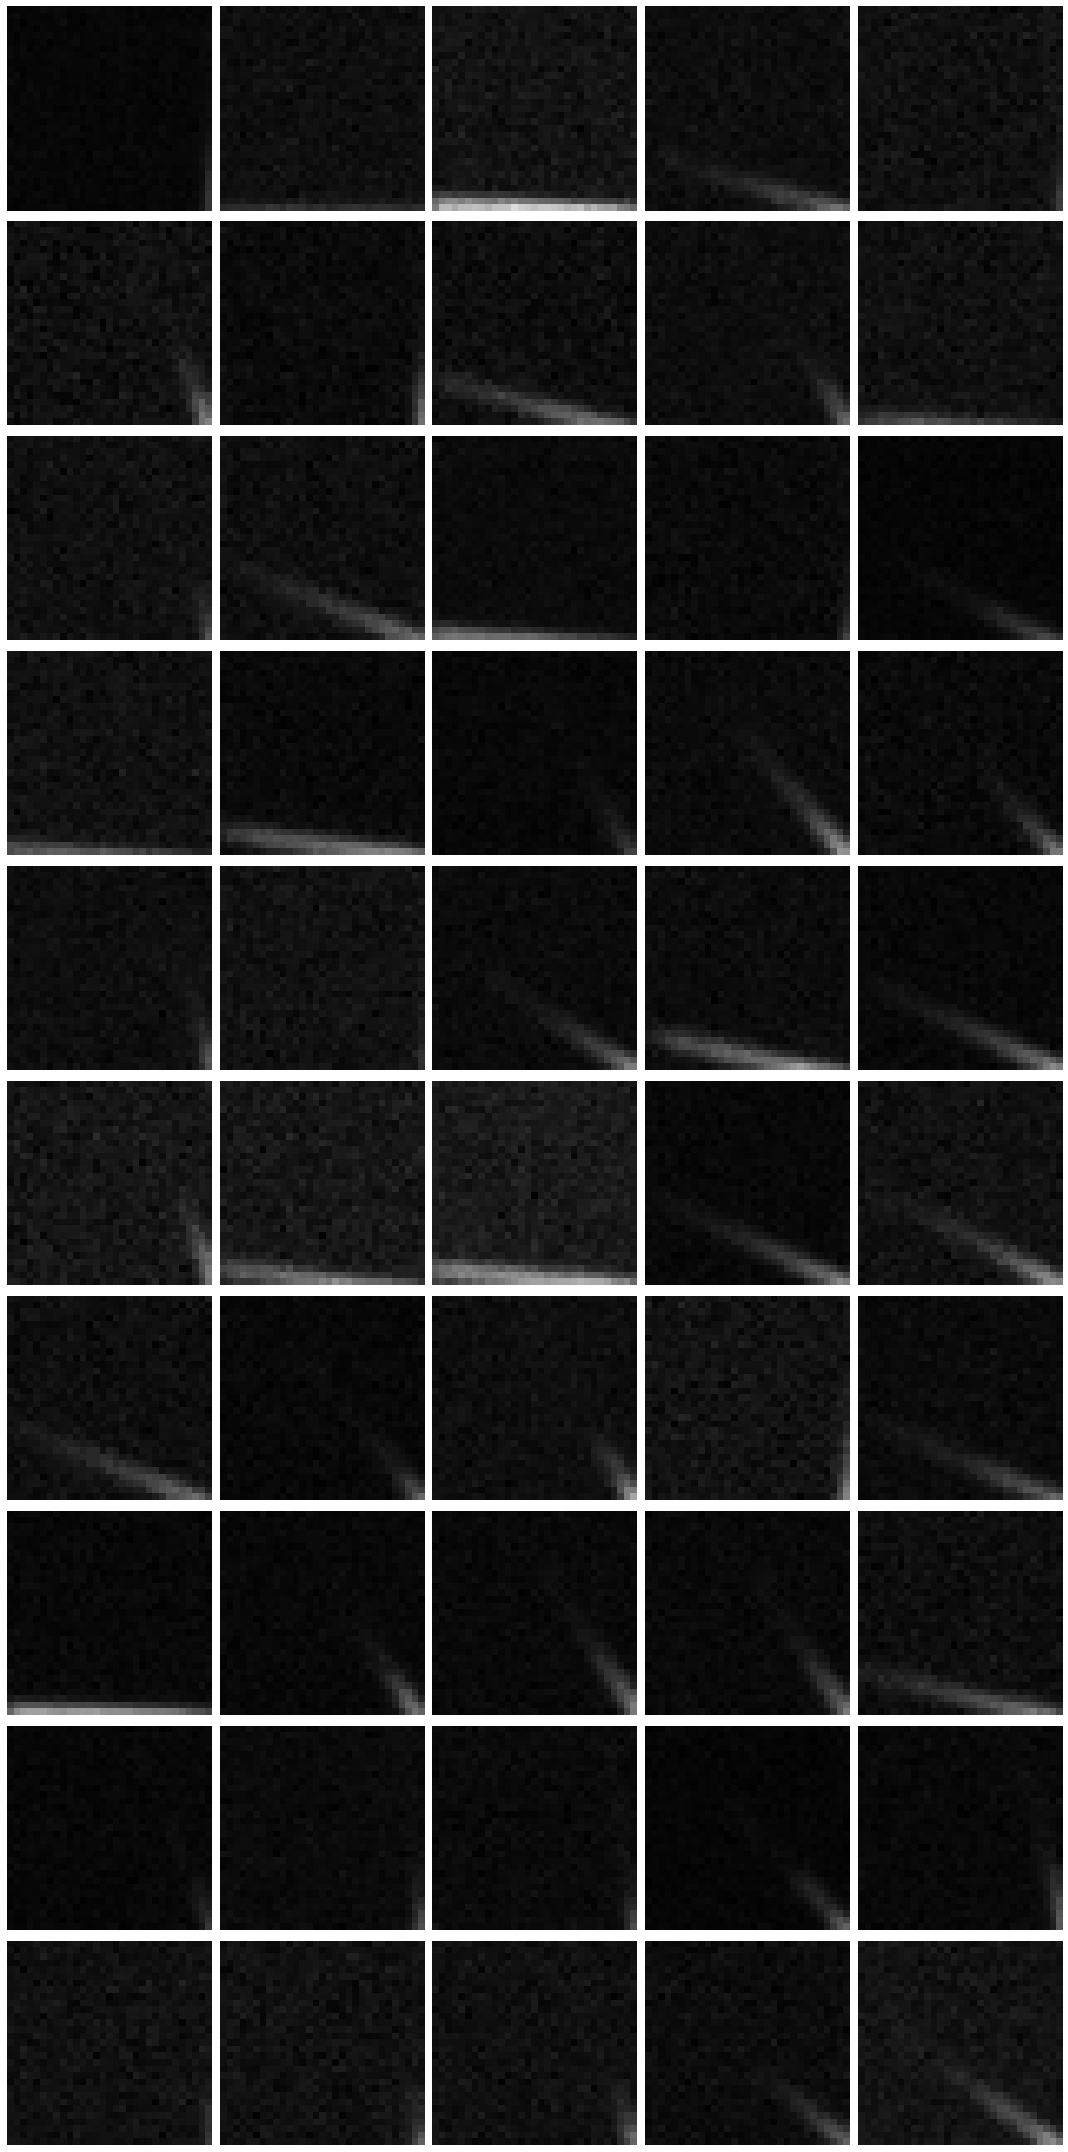

In [253]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

for i in range(10):
    for j in range(5):
        idx = np.random.randint(0, len(images))
        img, _ = read_tif(images[idx])
        
        imgc, _ = crop(img, (32, 32))

        ax[i, j].imshow(imgc, cmap='gray', vmax=1000)
        ax[i, j].axis('off')
        
plt.tight_layout();

## Data gen

In [294]:
import cv2
import numpy as np

class RandomFlip(object):
    '''
    Flips the image horizontally (mode=0), vertically (mode=1), 
    or diagonally (mode=2).
    '''

    def __init__(self, prob=0.5):
        assert isinstance(prob, (float, tuple))
        self.prob = prob

    def __call__(self, sample):
        image, tip, subp = sample['image'], sample['tip'], sample['subpixel']

        if np.random.random() < self.prob:
            mode = np.random.choice([0, 1, 2])
            image, tip, subp = self.flip(image, tip, subp, mode=mode)
            
        sample['image'], sample['tip'], sample['subpixel'] = image, tip, subp
        return sample

    def flip(self, img, tip, subpixel, mode=0):
        # mode 0: horizontal flip, 1: vertical flip, 2: diagonal flip
        h, w = img.shape
        
        subpixel = np.array(subpixel).reshape([int(len(subpixel)**0.5)] * 2)
        point = [np.where(subpixel==1)[0][0], np.where(subpixel==1)[1][0]]

        if mode == 0:
            flip = cv2.flip(img, 1)
            tip = (tip[0], w-tip[1]-1)
            point[1] = len(subpixel) - point[1] - 1
        elif mode == 1:
            flip = cv2.flip(img, 0)
            tip = (h-tip[0]-1, tip[1])
            point[0] = len(subpixel) - point[0] - 1
        else:
            flip = cv2.flip(cv2.flip(img, 1), 0)
            tip = (h-tip[0]-1, w-tip[1]-1)
            point[0] = len(subpixel) - point[0] - 1
            point[1] = len(subpixel) - point[1] - 1
        
        subpixel[:] = 0
        subpixel[tuple(point)] = 1
        
        return flip, tip, subpixel.ravel()

class RandomCrop(object):
    '''
    Crops the image randomly in a sample.
    '''

    def __init__(self, size, prob=0.5, pad=5, noisy=False):
        assert isinstance(prob, (float, tuple))
        self.size = size
        self.prob = prob
        self.pad = pad
        self.noisy = noisy

    def __call__(self, sample):
        image, tip = sample['image'], sample['tip']
        h, _ = image.shape
        noisy = False

        if np.random.random() < self.prob:
            if self.noisy and np.random.random() < 0.2:
                # crop of the background
                starti, startj = np.random.randint(0, 2, size=2) 
                noisy = True
            else:
                # random crop
                starti, startj = np.random.randint(
                    self.pad, h - self.size - (self.pad*2), size=2
                )
        else:
            # center crop
            starti, startj = (h - self.size)//2, (h - self.size)//2            
    
        endi, endj = starti + self.size, startj + self.size            
        image = image[starti:endi, startj:endj]
        tip = (tip[0] - starti, tip[1] - startj)

        if noisy:
            tip = (0, 0)

        sample['image'], sample['tip'] = image, tip
        return sample

class Overlap(object):
    '''
    Overlaps two comets
    '''

    def __init__(self, size):
        self.crop = RandomCrop(size, 1.0)
        self.flip = RandomFlip(1.0)

    def __call__(self, sample):

        image1, tip1 = sample['image1'], sample['tip1']
        image2, tip2 = sample['image2'], sample['tip2']
        mode1, mode2 = np.random.choice(3, replace=False, size=2)

        sp = self.crop({'image': image1, 'tip': tip1})
        imgc, p1 = sp['image'], sp['tip']
        subp = [1, 0, 0, 0, 0, 0, 0, 0, 0]
        
        if np.random.random() < 0.75:
            img1, p1, _ = self.flip.flip(imgc, p1, subp, mode=mode1)
        else:
            img1, p1 = imgc, p1

        sp = self.crop({'image': image2, 'tip': tip2})
        imgc, p2 = sp['image'], sp['tip']
        subp = [1, 0, 0, 0, 0, 0, 0, 0, 0]
        img2, p2, _ = self.flip.flip(imgc, p2, subp, mode=mode2)
        
        out = (img1 + img2)*0.7
        return {'image': out.astype('uint16'), 'tip': [p1, p2]} 

In [295]:
import glob
import torch
import tifffile
import numpy as np
# from transform import Overlap

class CustomDataGenerator(torch.utils.data.Dataset):
    def __init__(self, root_dir, subpixels=9, imgs=31, transform=None, train=True):
        self.train = train                                                      # returns image file name when True
        self.dir = root_dir
        self.imgs = imgs
        self.subpixels = subpixels
        self.transform = transform                                              # image transforms for data augmentation
        self.overlap = Overlap(size=imgs)
        self.images = sorted(glob.glob(self.dir + '/data_A/comet_*.tif'))

    def __len__(self):
        return len(self.images) * self.subpixels

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # send noise instead
        if np.random.random() < 0.3:
            return self.noisy_image(idx)
        elif np.random.random() < 0.8:
            return self.comet_image(idx)
        else:
            return self.overlap_image(idx) 

    def comet_image(self, idx):
        # make subpixel as one-hot label
        subpixel = idx // len(self.images)
        label = np.zeros((self.subpixels, 1))
        label[subpixel] = 1
        
        # read image
        fname = self.images[idx % len(self.images)]
        fname = fname.replace('data_A', f'data_{chr(65+subpixel)}')
        img = tifffile.imread(fname)
         
        # assuming the comet/polymer tip is centered in the image
        size = len(img)
        tip = (size//2, size//2)
        
        sample = {'image': img, 'tip': tip, 'subpixel': label}

        if self.transform:
            sample = self.transform(sample)
            img, tip = sample['image'], sample['tip']
            label = sample['subpixel']

        # normalize image
        img = img.astype(np.float32)
        img = np.clip(img, 0, 1000) / 1000
        img = np.expand_dims(img, axis=0)                                       # add channel dimension
        
        # treat tip as a segmentation mask
        mask = np.zeros_like(img[0])
        if tip[0] == 0 or \
            tip[1] == 0 or \
            tip[0] == self.imgs-1 or \
            tip[1] == self.imgs-1:
            tip = (0, 0)
        else:
            mask[tip[0], tip[1]] = 1

        label = label.reshape(-1)
        # add last label for no-comet
        # label = np.hstack([label, [0]])

        # label = np.array([1, 0])
        if self.train:
            return img, mask, label
        return img, np.array(tip), np.argmax(label), fname.split('/')[-1][:-4]

    def noisy_image(self, idx):
        # make subpixel as one-hot label
        subpixel = idx // len(self.images)
        label = np.zeros((self.subpixels, 1))
        label[subpixel] = 1
        
        # read image
        fname = self.images[idx % len(self.images)]
        fname = fname.replace('data_A', f'data_{chr(65+subpixel)}')
        fname = fname.replace('comet', 'noise')
        img = tifffile.imread(fname)
        
        tip = (0, 0)
        sample = {'image': img, 'tip': tip, 'subpixel': label}

        if self.transform:
            sample = self.transform(sample)
            img = sample['image']

        # normalize image
        img = img.astype(np.float32)
        img = np.clip(img, 0, 1000) / 1000
        img = np.expand_dims(img, axis=0)                                       # add channel dimension
        
        # treat tip as a segmentation mask
        mask = np.zeros_like(img[0])
        
        label = np.zeros((self.subpixels+1, 1))
        label[-1] = 1
        label = label.reshape(-1)

        # label = np.array([0, 1])
        if self.train:
            return img, mask, label
        return img, np.array(tip), np.argmax(label), fname.split('/')[-1][:-4]

    def overlap_image(self, idx):
        # make subpixel as one-hot label
        subpixel = idx // len(self.images)
        label = np.zeros((self.subpixels, 1))
        label[subpixel] = 1
        
        # read image
        fname = self.images[idx % len(self.images)]
        fname = fname.replace('data_A', f'data_{chr(65+subpixel)}')
        img = tifffile.imread(fname)

        # read another random image
        fname2 = np.random.choice(self.images)
        fname2 = fname2.replace('data_A', f'data_{chr(65+subpixel)}')
        img2 = tifffile.imread(fname2)  
        
        # assuming the comet/polymer tip is centered in the image
        size = len(img)
        tip = (size//2, size//2)
        
        sample = {'image1': img, 'tip1': tip, 'image2': img2, 'tip2': tip}
        sample = self.overlap(sample)
        img, tip = sample['image'], sample['tip']
            
        # normalize image
        img = img.astype(np.float32)
        img = np.clip(img, 0, 1000) / 1000
        img = np.expand_dims(img, axis=0)                                       # add channel dimension
        
        # treat tip as a segmentation mask
        mask = np.zeros_like(img[0])
        mask[tip[0][0], tip[0][1]] = 1
        mask[tip[1][0], tip[1][1]] = 1

        label = label.reshape(-1)
        if self.train:
            return img, mask, label
        return img, np.array(tip[0]), np.argmax(label), fname.split('/')[-1][:-4]

class TestDataGenerator(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.dir = root_dir
        self.transform = transform 
        self.images = sorted(glob.glob(self.dir + '/comet_*.tif'))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
    
        # read image
        fname = self.images[idx]
        img = tifffile.imread(fname)
        
        # normalize image
        img = img.astype(np.float32)
        img = np.clip(img, 0, 1000) / 1000
        img = np.expand_dims(img, axis=0)                                       # add channel dimension
        
        return img, fname.split('/')[-1][:-4]

In [296]:
from torch.utils.data import DataLoader
from torchvision import transforms

valDataset = CustomDataGenerator(
        '../images/val',
        transform=transforms.Compose([
            RandomCrop(31, 0.8, noisy=True),
            RandomFlip(0.7),
        ]),
        train=False
    )
loader = DataLoader(valDataset, batch_size=256, shuffle=False)

In [297]:
for i, j, k, f in iter(loader):
    img = i.numpy()
    tip = j.numpy()
    label = k
    fname = f
    break

In [298]:
img.shape

(256, 1, 31, 31)

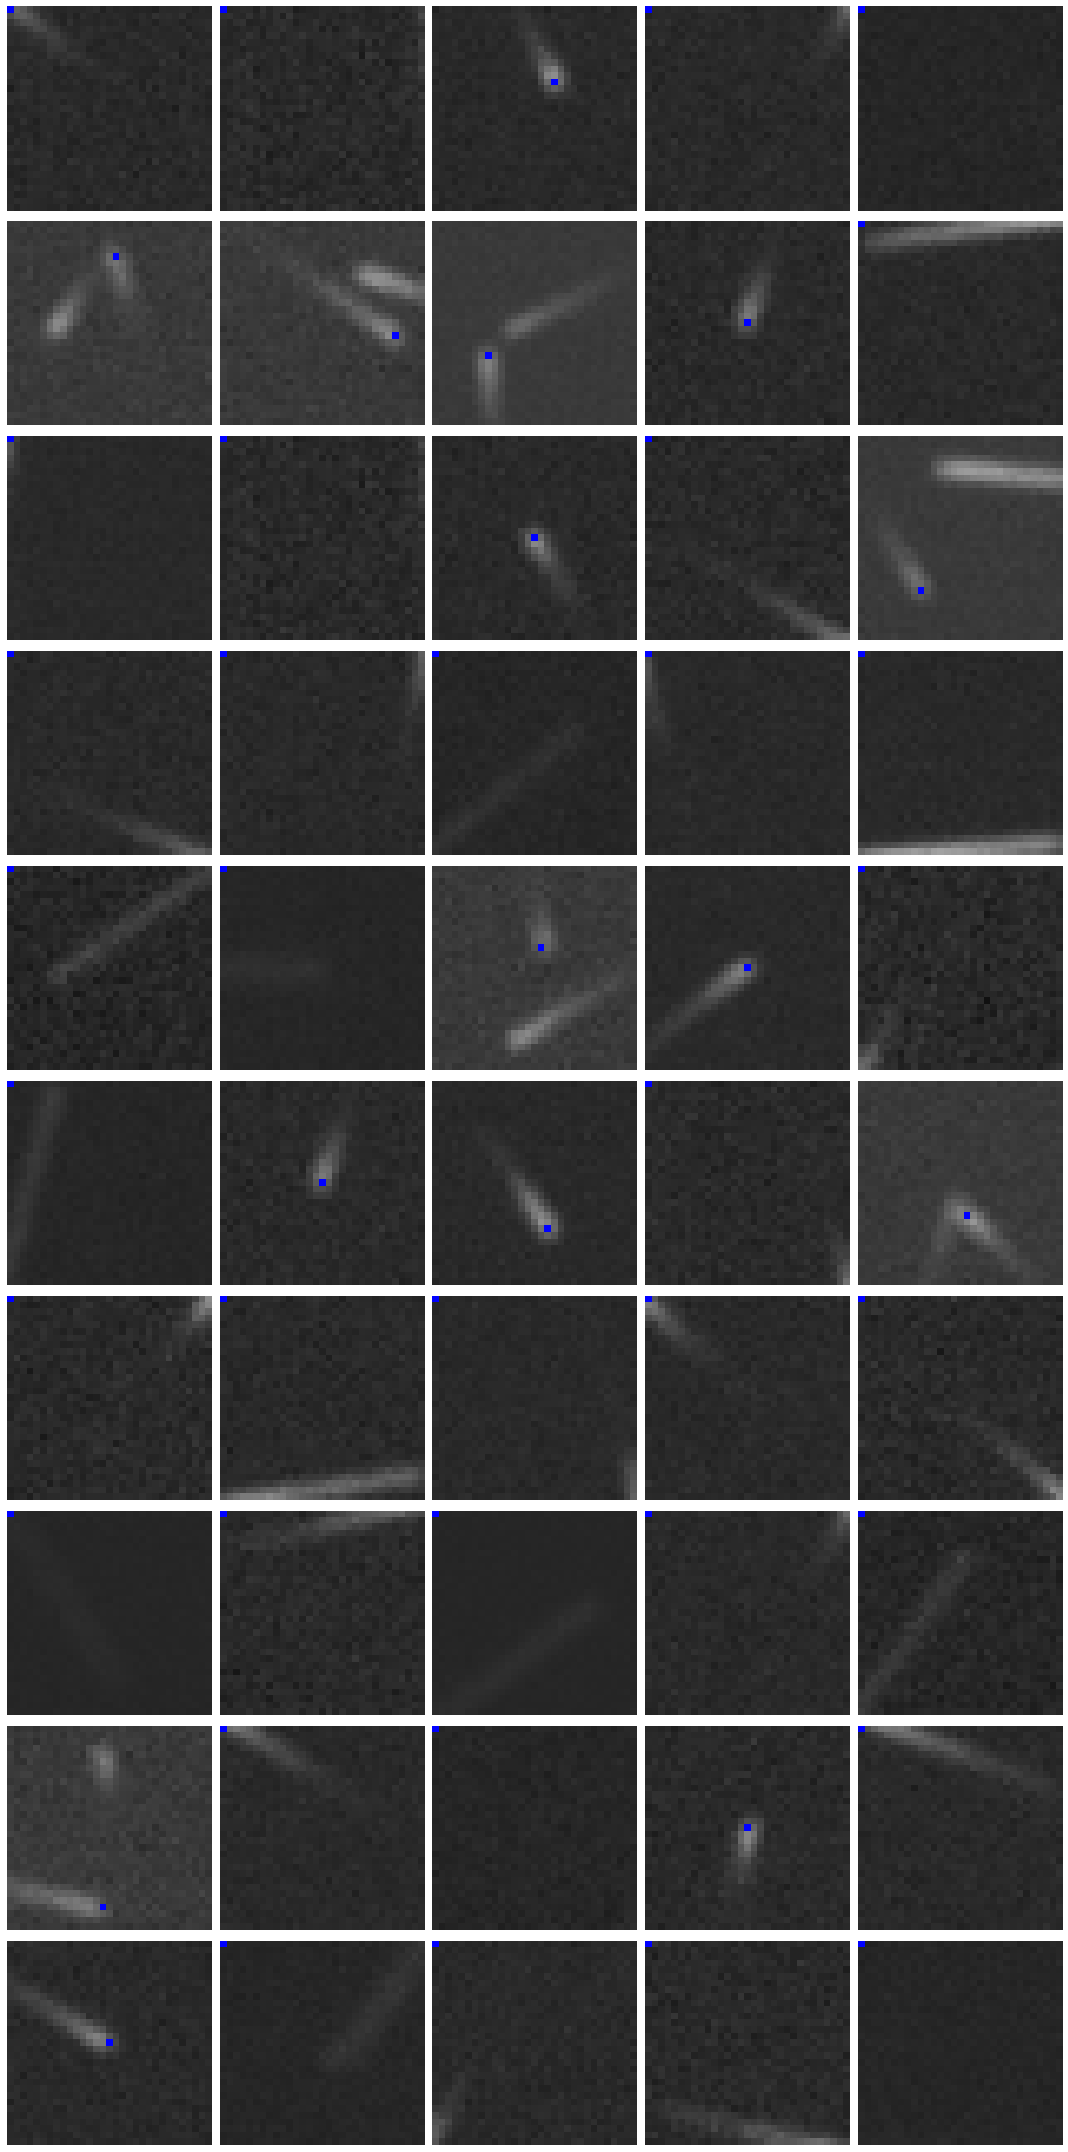

In [299]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

for i in range(10):
    for j in range(5):
        idx = np.random.randint(0, len(img))
        
        im = np.vstack([img[idx], img[idx], img[idx]]).transpose((1, 2, 0))
        im[tip[idx][0], tip[idx][1]] = [0, 0, 1]
        ax[i, j].imshow(im, vmin=0, vmax=1)
        ax[i, j].axis('off')
        
plt.tight_layout();

In [186]:
testDataset = TestDataGenerator(
        '../images/test'
    )
testloader = DataLoader(testDataset, batch_size=256, shuffle=False)

In [187]:
for i, f in iter(testloader):
    img = i.numpy()
    fname = f
    break

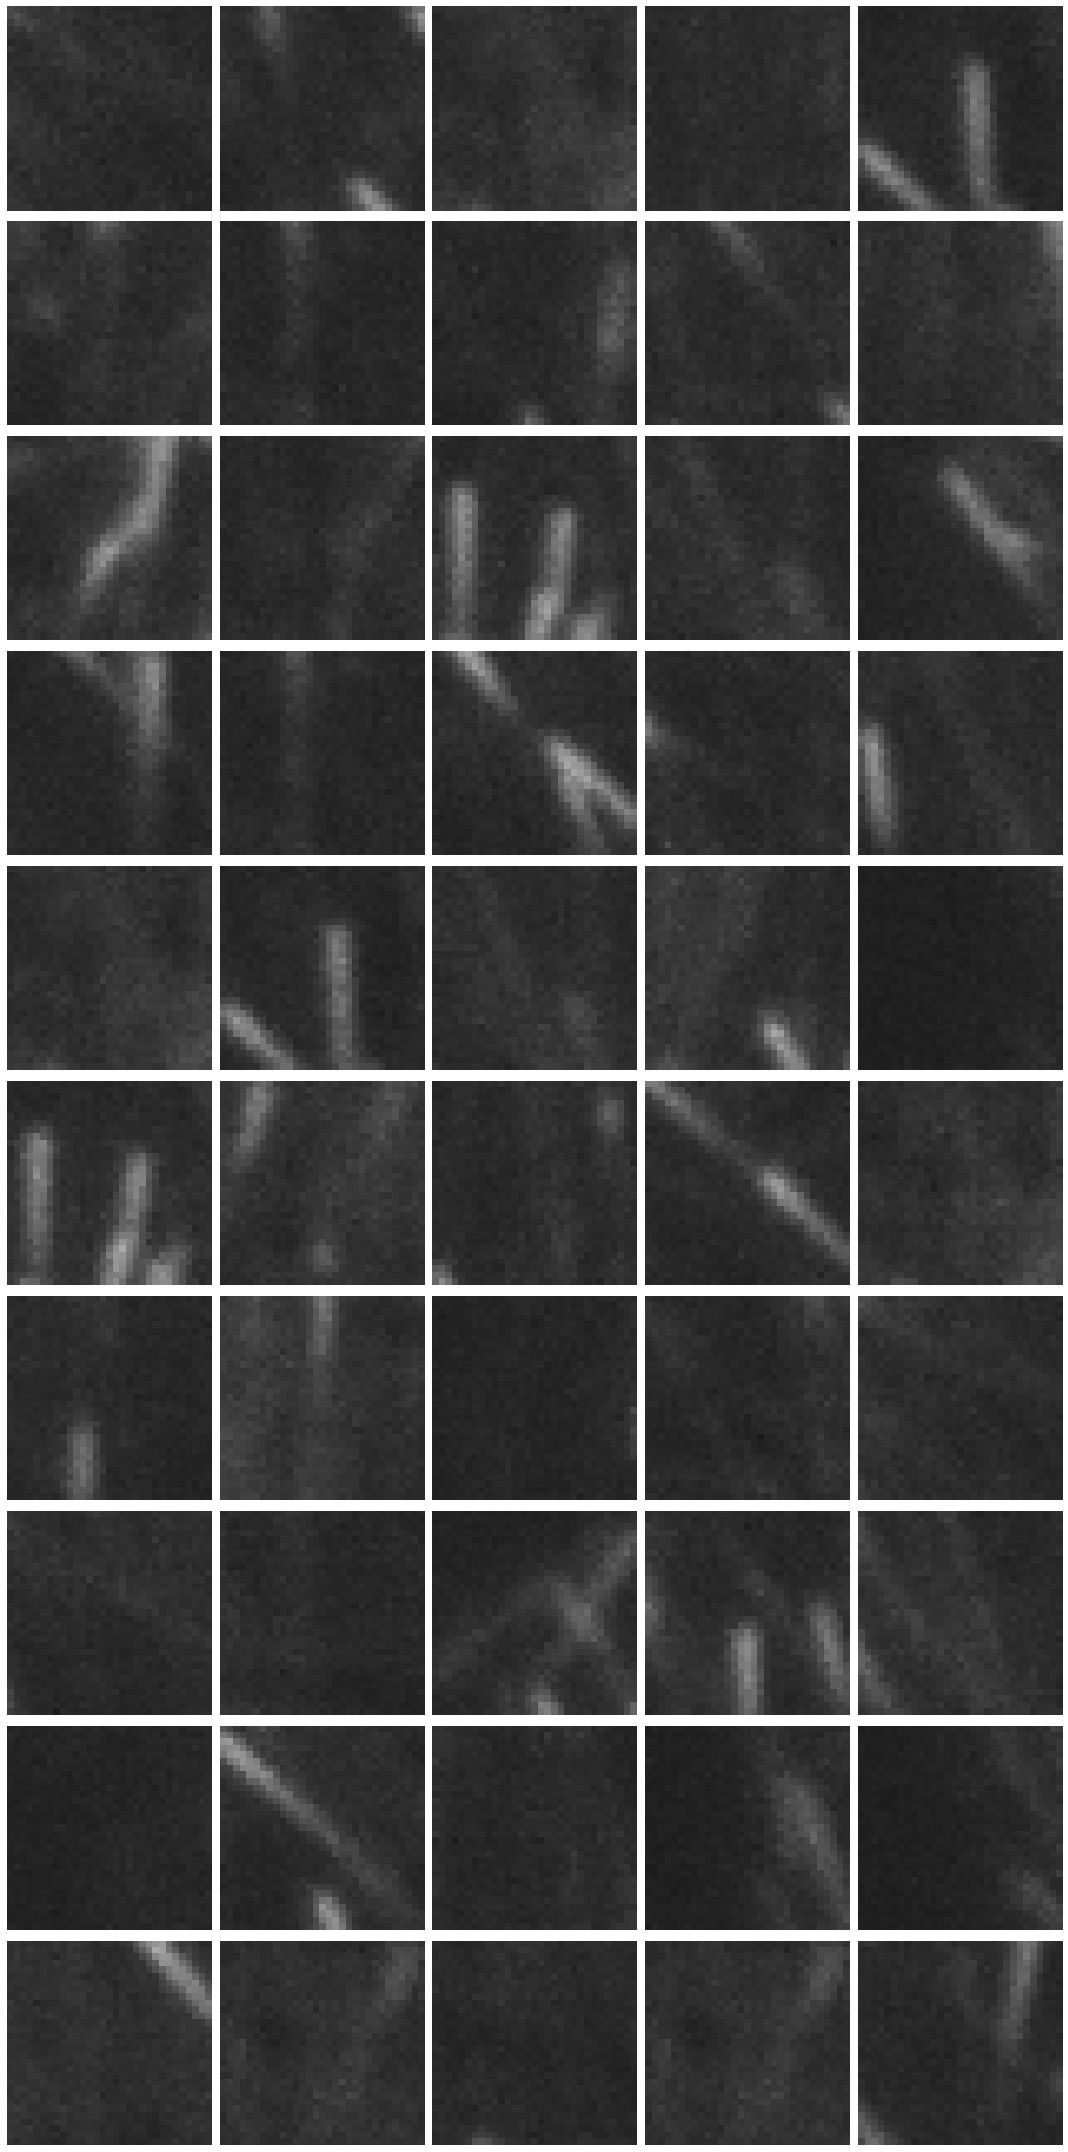

In [188]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

for i in range(10):
    for j in range(5):
        idx = np.random.randint(0, len(img))
        
        im = np.vstack([img[idx], img[idx], img[idx]]).transpose((1, 2, 0))
        ax[i, j].imshow(im, vmin=0, vmax=1)
        ax[i, j].axis('off')
        
plt.tight_layout();

# Model

In [2]:
import torch
import torch.nn as nn

class ConvBlock(nn.Module):
    def __init__(self, channel_in, channel_out, dilation=1):
        super().__init__()
        self.conv1 = nn.Conv2d(channel_in, channel_out, kernel_size=3, padding='same', dilation=dilation)
        self.conv2 = nn.Conv2d(channel_out, channel_out, kernel_size=3, padding='same', dilation=dilation)
        self.bnorm1 = nn.BatchNorm2d(channel_out)
        self.bnorm2 = nn.BatchNorm2d(channel_out)
        self.activation = nn.ReLU(inplace=True)

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.activation(self.bnorm1(conv1))
        conv2 = self.conv2(conv1)
        conv2 = self.activation(self.bnorm2(conv2))
        return conv2

class Downsample(nn.Module):
    def __init__(self, channel_in):
        super().__init__()
        self.downsample = nn.Conv2d(channel_in, channel_in * 2, kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        return self.downsample(x)

class Upsample(nn.Module):
    def __init__(self, channel_in, channel_out):
        super().__init__()
        self.conv_transpose = nn.ConvTranspose2d(channel_in, channel_out, kernel_size=2, stride=2)

    def forward(self, x):
        return self.conv_transpose(x)

class Linear(nn.Module):
    def __init__(self, in_features, out_features, activation=None):
        super().__init__()
        self.activation = activation
        self.layer = nn.Linear(in_features, out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        if self.activation == 'relu':
            return self.relu(self.layer(x))
        return self.layer(x)  

class UNet(nn.Module):
    def __init__(self, channels, classes=1, subpixels=9):
        super(UNet, self).__init__()
        self.CHANNELS = channels
        self.CLASSES = classes
        self.SUBPIXELS = subpixels

        self.inp = ConvBlock(self.CHANNELS, 64)

        self.stage1 = ConvBlock(128, 128, dilation=1)
        self.stage2 = ConvBlock(256, 256, dilation=1)
        self.stage3 = ConvBlock(512, 512, dilation=2)

        self.down1 = Downsample(64)
        self.down2 = Downsample(128)
        self.down3 = Downsample(256)

        self.up1 = Upsample(512, 256)
        self.up2 = Upsample(256, 128)
        self.up3 = Upsample(128, 64)

        self.stage3i = ConvBlock(512, 256, dilation=2)
        self.stage2i = ConvBlock(256, 128, dilation=1)
        self.stage1i = ConvBlock(128, 64, dilation=1)

        self.out = nn.Conv2d(64, self.CLASSES, kernel_size=1)

        # subpixel classifier
        self.linear1 = Linear(512 * 4 * 4, 512, activation='relu')
        self.linear2 = Linear(512, 256, activation='relu')
        self.linear3 = Linear(256, self.SUBPIXELS, activation=None)

    def forward(self, x):
        size = x.shape[-1]
        
        a1 = self.inp(x)
        d1 = self.down1(a1)

        a2 = self.stage1(d1)
        d2 = self.down2(a2)

        a3 = self.stage2(d2)
        d3 = self.down3(a3)

        a4 = self.stage3(d3)
        u1 = self.up1(a4)

        c1 = self.stage3i(torch.cat([a3, u1], dim=1))
        u2 = self.up2(c1)

        c2 = self.stage2i(torch.cat([a2, u2], dim=1))
        u3 = self.up3(c2)
        u3 = u3[:, :, :size, :size]

        c3 = self.stage1i(torch.cat([a1, u3], dim=1))
        mask = self.out(c3)

        # subpixel classifier
        flat = torch.flatten(a4, start_dim=1)
        
        l1 = self.linear1(flat)
        l2 = self.linear2(l1)
        subp = self.linear3(l2)

        return mask, subp

In [148]:
from torchsummary import summary
model = UNet(1)
summary(model, (1, 31, 31))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 31, 31]             640
       BatchNorm2d-2           [-1, 64, 31, 31]             128
              ReLU-3           [-1, 64, 31, 31]               0
            Conv2d-4           [-1, 64, 31, 31]          36,928
       BatchNorm2d-5           [-1, 64, 31, 31]             128
              ReLU-6           [-1, 64, 31, 31]               0
         ConvBlock-7           [-1, 64, 31, 31]               0
            Conv2d-8          [-1, 128, 16, 16]          73,856
        Downsample-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 128, 16, 16]         147,584
      BatchNorm2d-14          [-1, 128,

# Analyse predictions

In [7]:
import imageio

In [4]:
def read_tif(filename):
    frames = tifffile.TiffFile(filename)
    page = frames.pages[0]
    metadata = page.tags["MicroManagerMetadata"].value
    return tifffile.imread(filename), metadata

In [5]:
imp = [3, 4, 9, 10, 17, 28, 33, 38, 39, 40, 41, 44, 45, 49, 51, 59, 60, 73, 86, 89, 91, 92, 93, 96, 100,
103, 106, 114, 117, 118, 126, 129, 133, 135, 139, 143, 144, 150, 157, 178, 180, 181, 184, 189, 191, 199, 
200, 213, 226, 231, 246, 257, 258, 273, 283, 284, 290, ]

In [4]:
plt.imshow(imgs, cmap='gray', vmin=0, vmax=1);

NameError: name 'imgs' is not defined

In [70]:
img[0].min(), img[0].max()

(-11.600249, -10.37567)

In [73]:
img[0].min(), img[0].max()

(1.5330872e-05, 1.5330872e-05)

In [69]:
fname = '../res/test_pred/comet_' + f'{str(imp[0])}.tif'.rjust(9, '0')
img, meta = read_tif(fname)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [72]:
img = sigmoid(img[0])

In [95]:
im.max(), im.min()

(543, 0)

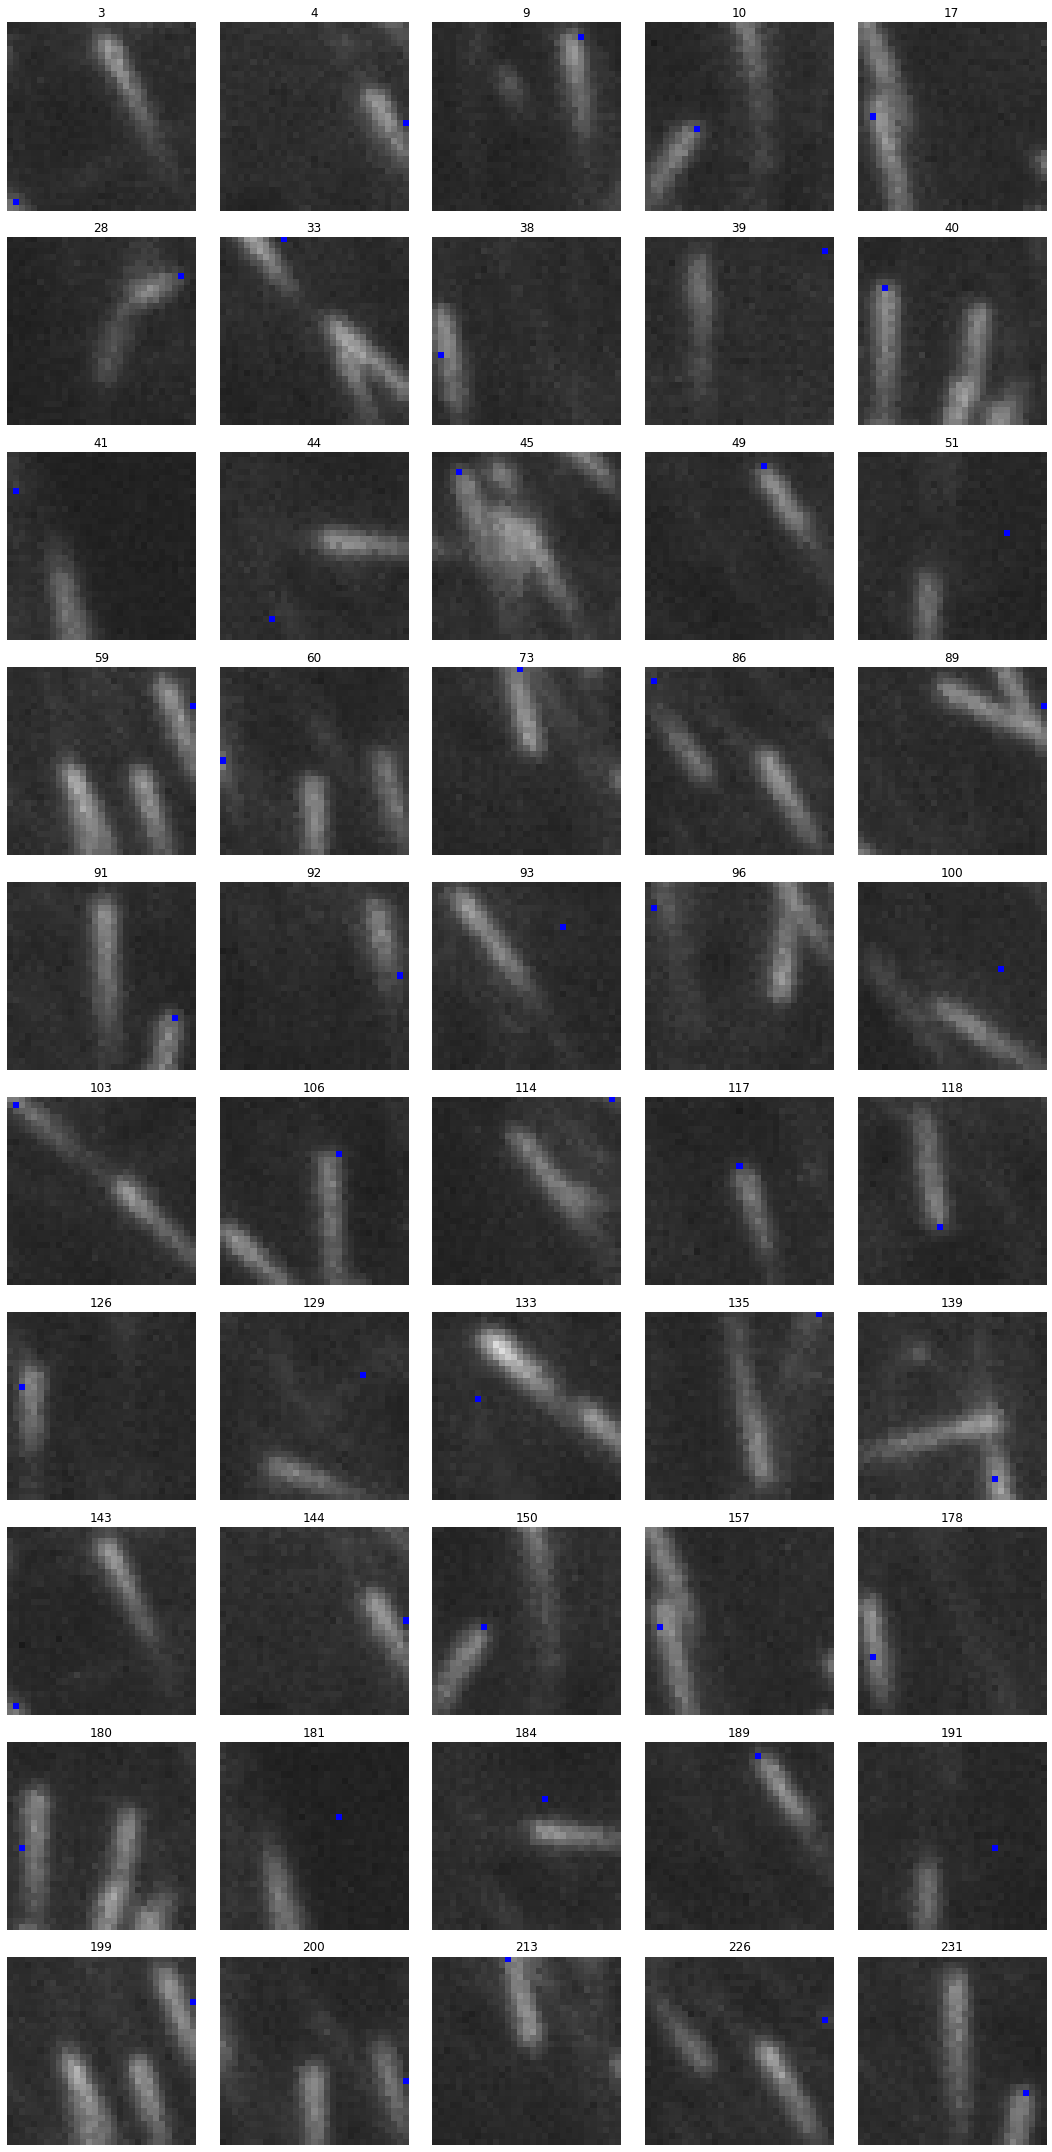

In [6]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

idx = 0
for i in range(10):
    for j in range(5):
        
        fname = '../res/test_pred/comet_' + f'{str(imp[idx])}.tif'.rjust(9, '0')
        mask, meta = read_tif(fname)

        fname_img = fname.replace('res', 'images').replace('test_pred', 'test')
        img = tifffile.imread(fname_img)
        img = np.expand_dims(img, axis=0)
        im = np.vstack([img]*3).transpose((1, 2, 0)) / 1000
        
        tip = meta['tip'].split(',')    
        im[int(tip[0]), int(tip[1])] = [0, 0, 1] 
        
        ax[i, j].imshow(im, cmap='gray', vmin=0, vmax=1)   
#         ax[i, j].imshow(sigmoid(img[0])>0.001, alpha=0.5)
        ax[i, j].set_title(imp[idx])
        ax[i, j].axis('off')
        idx += 1
        
plt.tight_layout();

In [2]:
fname = sorted(glob.glob('../res/test_pred2/comet_*.tif'))

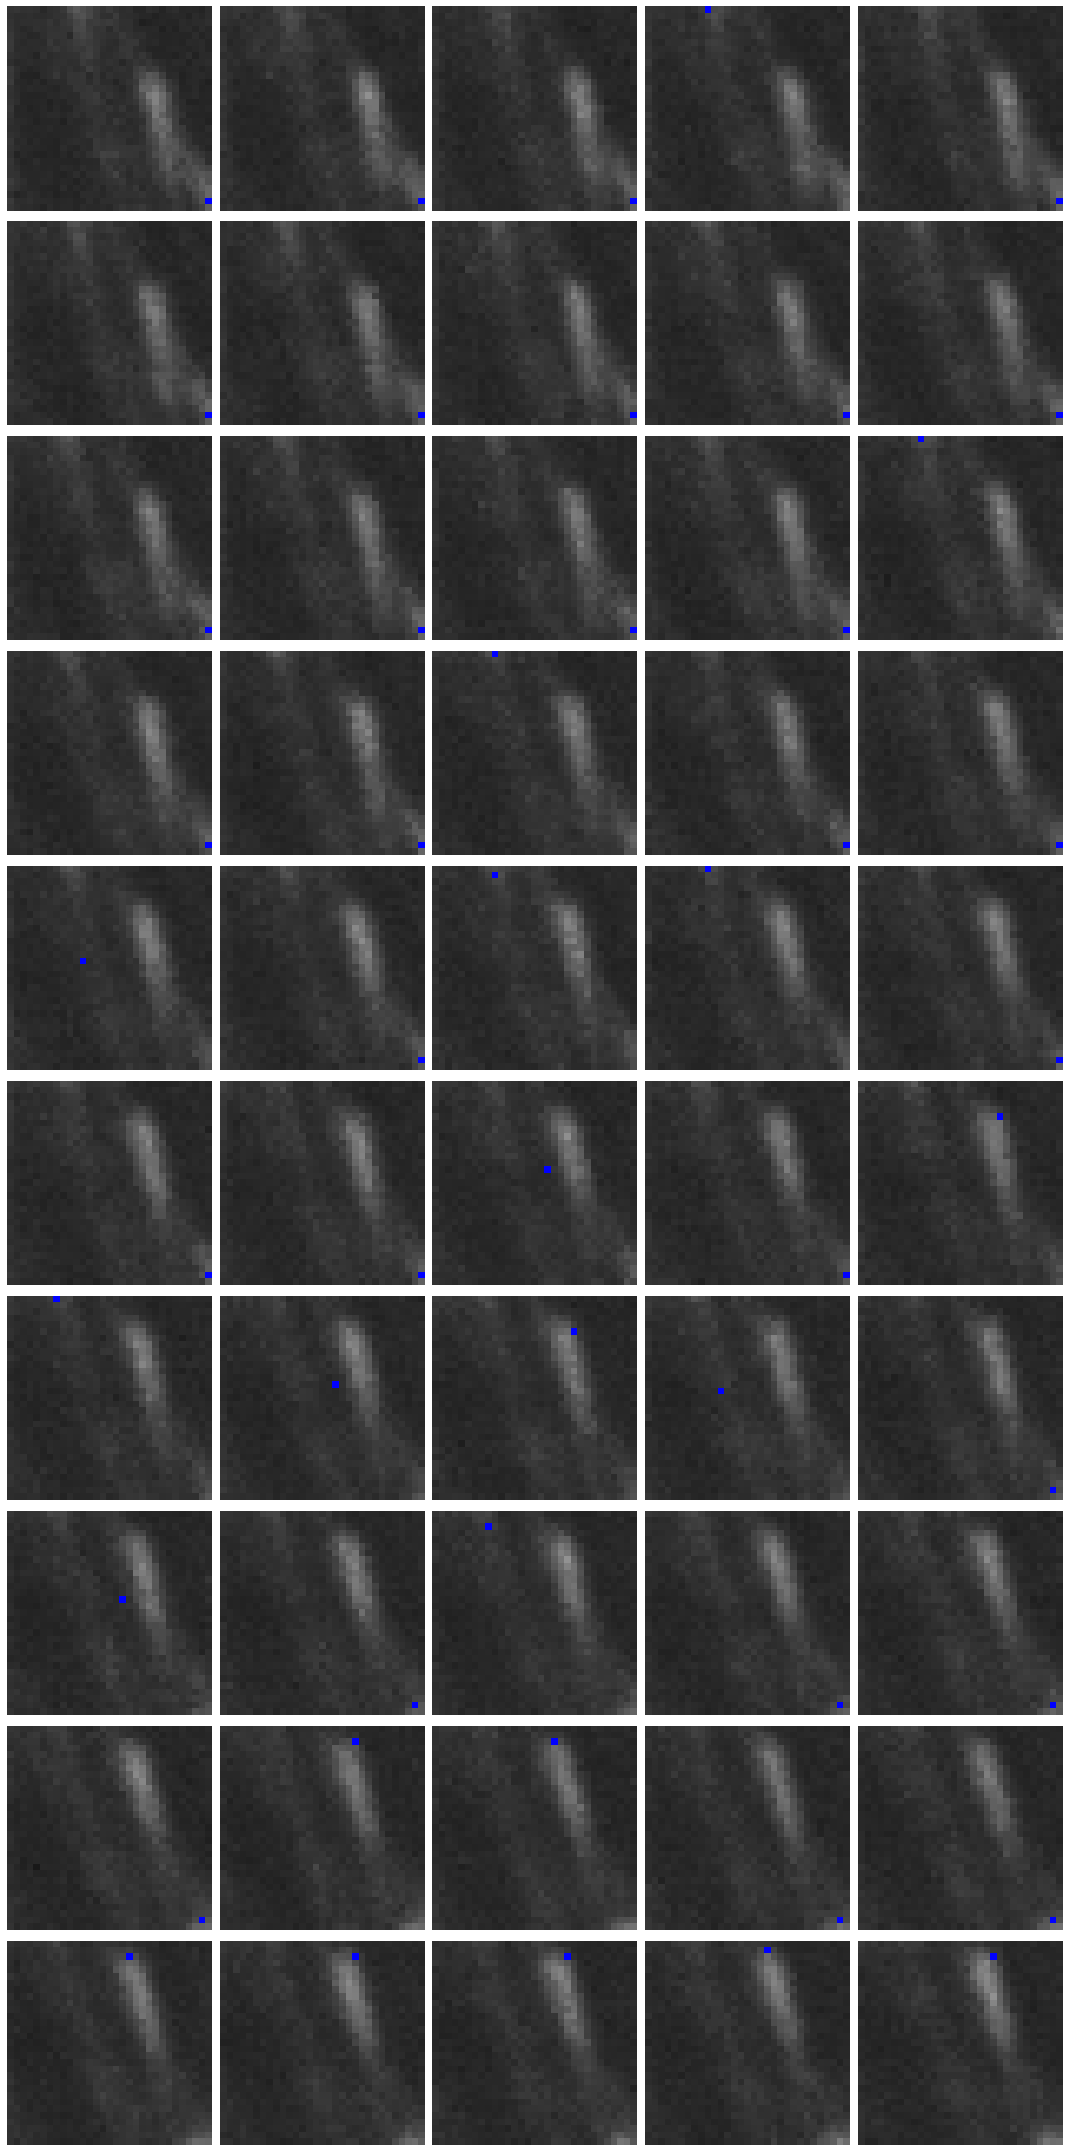

In [6]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

idx = 0
for i in range(10):
    for j in range(5):
        file = fname[idx+50]
        mask, meta = read_tif(file)

        fname_img = file.replace('res', 'images').replace('test_pred', 'test')
        img = tifffile.imread(fname_img)
        img = np.expand_dims(img, axis=0)
        im = np.vstack([img]*3).transpose((1, 2, 0)) / 1000
        
        tip = meta['tip'].split(',')    
        im[int(tip[0]), int(tip[1])] = [0, 0, 1] 
        
        ax[i, j].imshow(im, cmap='gray', vmin=0, vmax=1)   
#         ax[i, j].imshow(sigmoid(mask), alpha=0.5)
        ax[i, j].axis('off')
        idx += 1
        
plt.tight_layout();

In [8]:
import imageio

In [18]:
## Save GIF
image_stack = []
idx = 0
for i in range(200):
    file = fname[idx+600]
    mask, meta = read_tif(file)

    fname_img = file.replace('res', 'images').replace('test_pred', 'test')
    img = tifffile.imread(fname_img)
    img = np.expand_dims(img, axis=0)
    im = np.vstack([img]*3).transpose((1, 2, 0)) / 1000

    tip = meta['tip'].split(',')    
    im[int(tip[0]), int(tip[1])] = [0, 0, 1] 
    image_stack.append((im*255).astype('uint8'))
    idx += 1

In [19]:
imageio.mimsave('../res/test4.gif', image_stack)

# Test images

In [219]:
test_image = tifffile.imread('/Users/aman/Desktop/FADS/Eb1WT100mscrop1.tif')# '../../Eb1WT100mscrop1f1_10.tif')
t, h, w = test_image.shape
test_image.min(), test_image.max(), test_image.mean(), test_image.shape

(29, 912, 165.74007456914464, (601, 319, 435))

In [3]:
len(list(range(0, 319-31, 31))), len(list(range(0, 435-31, 31)))

(10, 14)

In [4]:
list(range(0, 601-31, 31))[7]

217

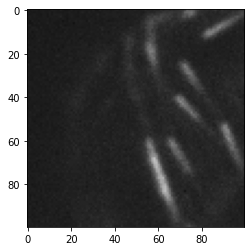

In [8]:
plt.imshow(test_image[200, :100, :100], cmap='gray', vmin=test_image.min(), vmax=test_image.max());

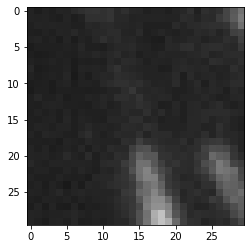

In [129]:
plt.imshow(test_image[200, 40:70, 40:70], cmap='gray', vmin=test_image.min(), vmax=test_image.max());

In [148]:
back = [test_image[100:200, 25:55, 25:55], test_image[200:300, 70:100, 70:100], test_image[500:600, 70:100, 70:100]]
back = np.vstack(back)
back.min(), back.max(), back.mean()

(62, 515, 158.81151111111112)

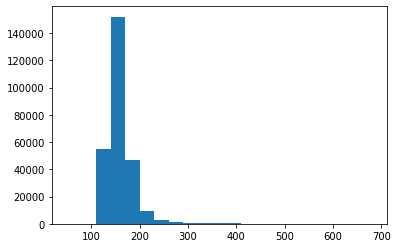

In [133]:
plt.hist(back.ravel(), bins=np.arange(50, 700, 30));

In [139]:
front = [test_image[360:460, 25:55, 25:55], test_image[0:100, 70:100, 70:100], test_image[200:300, 40:70, 40:70]]
front = np.vstack(front)
front.min(), front.max(), front.mean()

(71, 805, 194.7278259259259)

In [153]:
np.sum(back>450, axis=(1, 2))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 3, 0, 1,
       2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

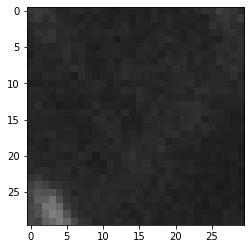

In [167]:
plt.imshow(back[133], cmap='gray', vmin=test_image.min(), vmax=test_image.max());

In [154]:
np.sum(front>450, axis=(1, 2))

array([14, 19, 15, 17, 17, 18, 15, 16, 19, 15, 14, 10, 12, 13, 15, 16, 14,
       13,  9, 14,  6,  9, 10,  8,  6,  7,  4,  8, 12, 10,  8, 12, 11, 10,
       13,  7, 10,  9, 11, 10, 13, 10, 10,  9,  9, 12, 14, 13, 14,  8, 13,
        8, 10,  9, 11, 12,  9,  8, 11,  9,  5,  6,  4,  9,  6,  9, 10,  9,
        9,  9,  6,  9,  8,  8,  4,  6,  9, 10, 10, 16, 16, 18, 16, 26, 28,
       26, 29, 32, 29, 34, 30, 30, 31, 26, 34, 30, 29, 32, 29, 32, 23, 17,
       20, 22, 19, 21, 20, 30, 23, 25, 20, 26, 25, 24, 21, 24, 24, 23, 25,
       29, 26, 22, 25, 22, 22, 25, 27, 23, 28, 22, 28, 26, 25, 23, 24, 23,
       37, 30, 37, 37, 40, 40, 46, 43, 34, 34, 25, 32, 28, 25, 25, 28, 34,
       32, 37, 24, 26, 27, 29, 25, 26, 36, 27, 27, 25, 28, 23, 28, 24, 20,
       24, 19, 23, 21, 21, 24, 19, 17, 21, 17, 19, 12, 13, 16, 18, 13, 21,
       20, 19, 18, 16, 16, 17, 19, 18, 17, 19, 16, 18, 22, 18, 18, 19, 17,
       23, 20, 18, 20, 23, 23, 34, 23, 23, 28, 36, 28, 26, 33, 32, 26, 36,
       32, 34, 36, 32, 34

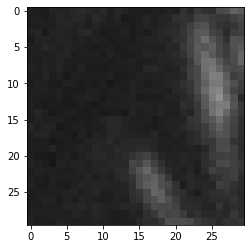

In [170]:
plt.imshow(front[63], cmap='gray', vmin=test_image.min(), vmax=test_image.max());

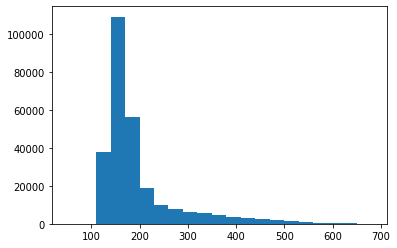

In [205]:
plt.hist(front.ravel(), bins=np.arange(50, 700, 30));

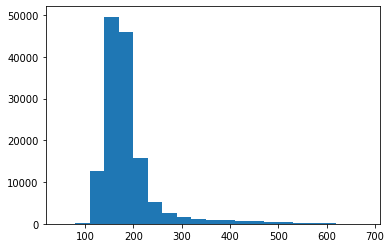

In [202]:
plt.hist(test_image.ravel(), bins=np.arange(50, 700, 30));

In [201]:
np.arange(50, 700, 30)

array([ 50,  80, 110, 140, 170, 200, 230, 260, 290, 320, 350, 380, 410,
       440, 470, 500, 530, 560, 590, 620, 650, 680])

In [147]:
imp = [[140, 110], [220, 100], [260, 170], [288, 150]]

In [149]:
# idx = 0
# for i, j in imp:
#     for t in range(200):
#         idx += 1
#         im = test_image[t, i:i+31, j:j+31]
#         tifffile.imwrite(
#             f'../images/test2/comet_' + f'{idx}.tif'.rjust(9, '0'),
#             data=im
#         )

In [136]:
idx = 0
for i in range(10):
    for j in range(5):
        file = fname[idx+50]
        mask, meta = read_tif(file)

        fname_img = file.replace('res', 'images').replace('test_pred', 'test')
        img = tifffile.imread(fname_img)
        img = np.expand_dims(img, axis=0)
        im = np.vstack([img]*3).transpose((1, 2, 0)) / 1000
        
        tip = meta['tip'].split(',')    
        im[int(tip[0]), int(tip[1])] = [0, 0, 1] 
        
        ax[i, j].imshow(im, cmap='gray', vmin=0, vmax=1)   
#         ax[i, j].imshow(sigmoid(mask), alpha=0.5)
        ax[i, j].axis('off')
        idx += 1
        
plt.tight_layout();

(156.0, 150.0)

In [197]:
def is_comet(im):
    return np.sum(im>400) >= 5

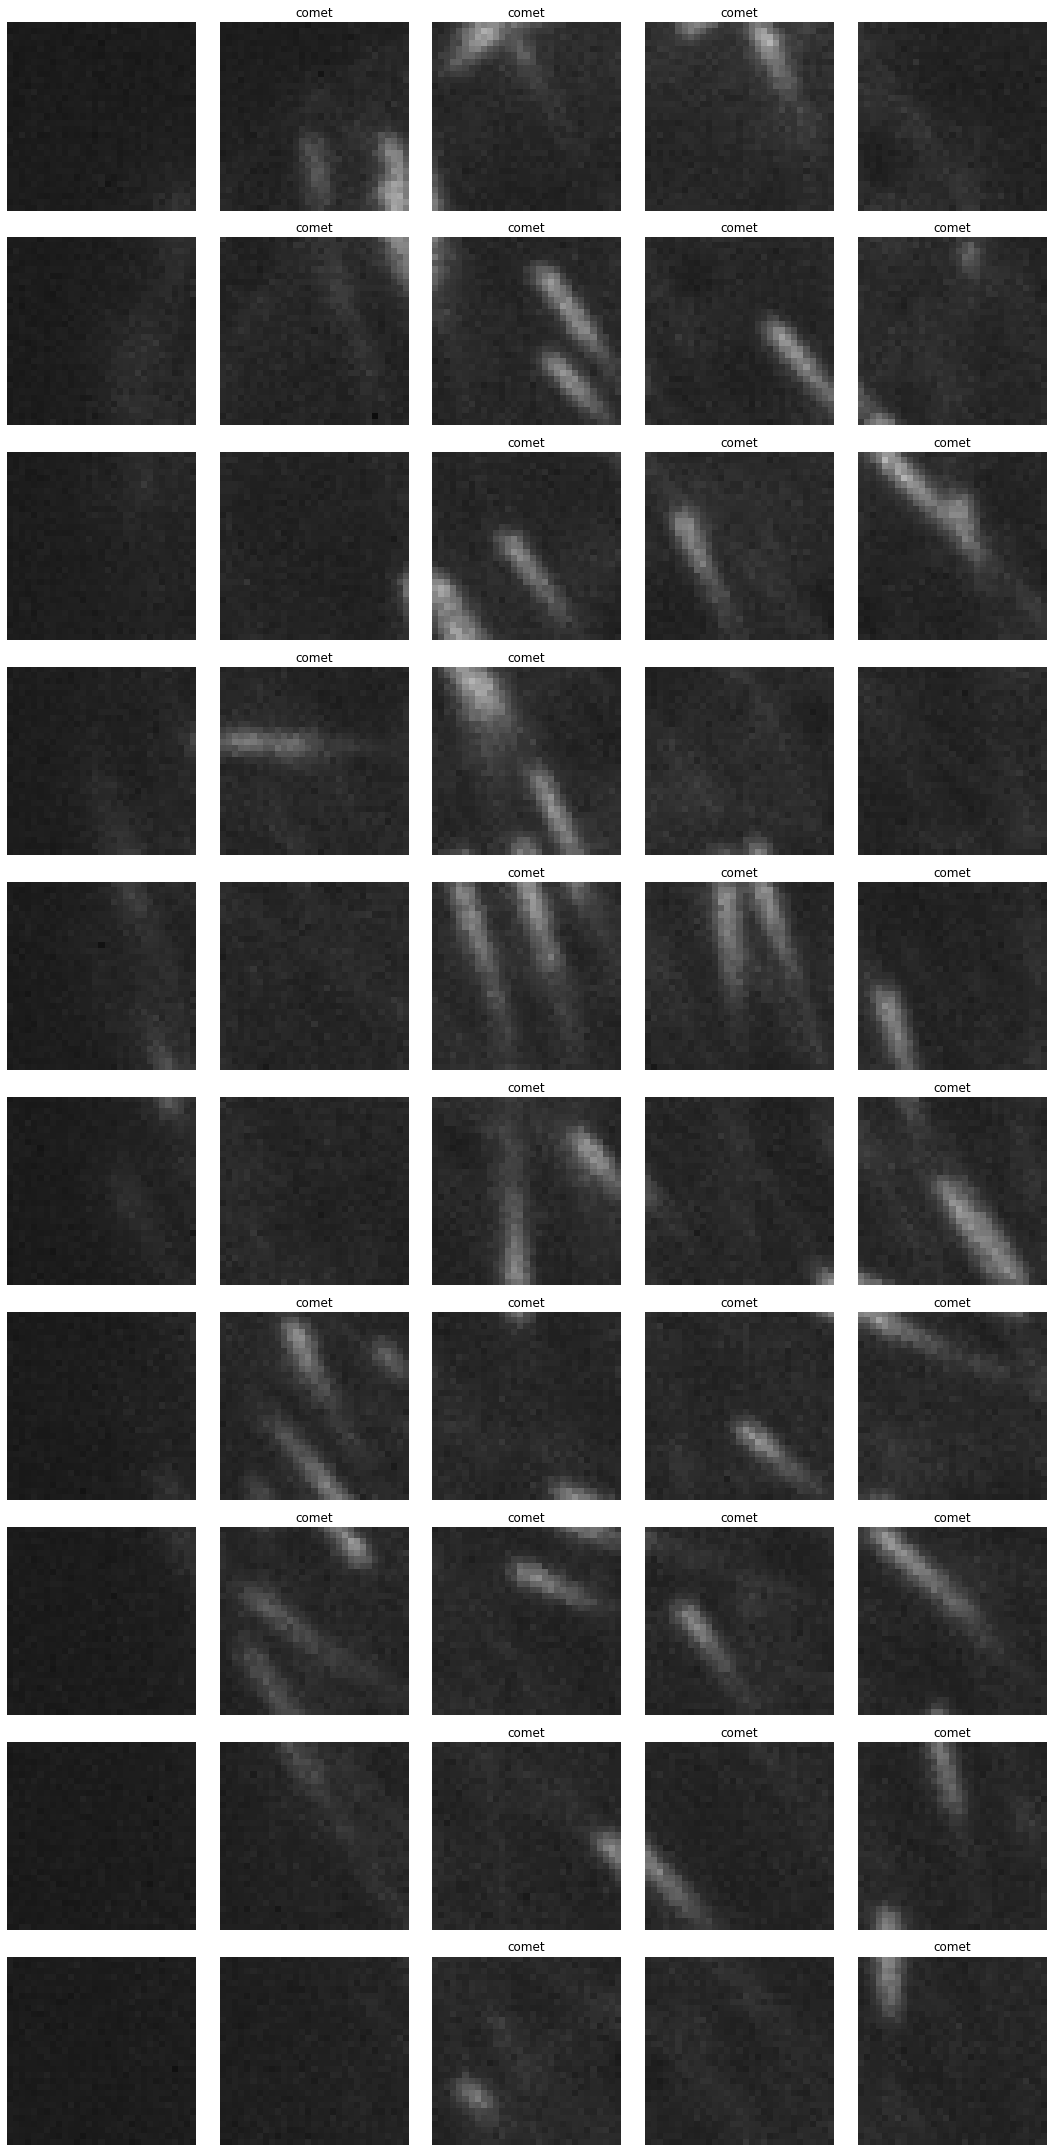

In [198]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

idx = 0
for i in range(10):
    for j in range(5):
        idx += 1
        im = test_image[100, (i*31):(i+1)*31, (j*31):(j+1)*31]
        ax[i, j].imshow(im, cmap='gray', vmin=test_image.min(), vmax=test_image.max()) 
        ax[i, j].axis('off')
        if is_comet(im):
            ax[i, j].set_title('comet')
plt.tight_layout()

In [188]:
# idx = 0
# for k in range(t):
#     for i in range(0, h-31, 31):
#         for j in range(0, w-31, 31):
#             idx += 1
#             im = test_image[k, i:i+31, j:j+31]
#             tifffile.imwrite(
#                 f'../images/test/comet_' + f'{idx}.tif'.rjust(9, '0'),
#                 data=im
#             )

In [38]:
def read_tif(filename):
    frames = tifffile.TiffFile(filename)
    page = frames.pages[0]
    metadata = page.tags["MicroManagerMetadata"].value
    return tifffile.imread(filename), metadata

In [155]:
fnames = sorted(glob.glob('../images/test2/comet_*.tif'))

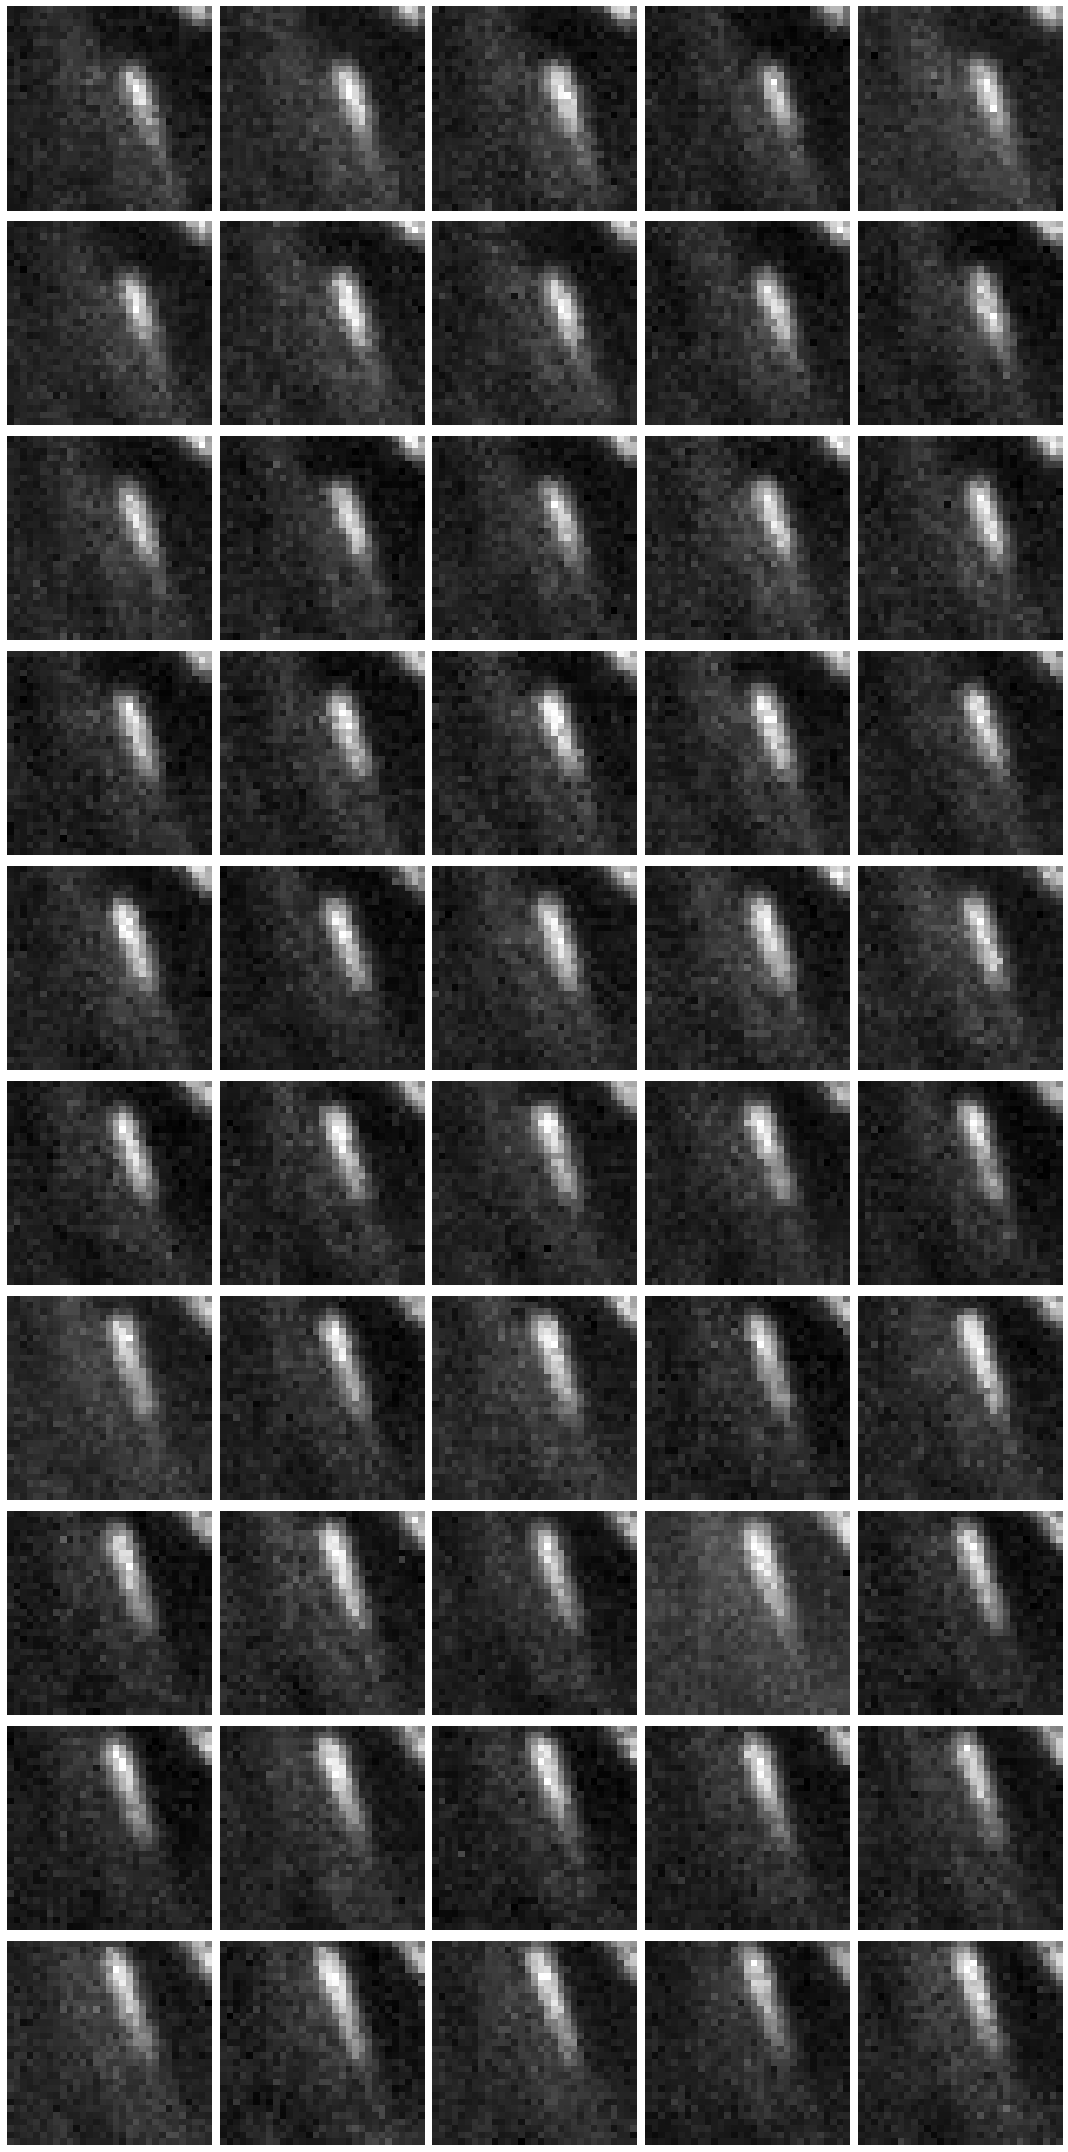

In [170]:
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

idx = 0
for i in range(10):
    for j in range(5):
        im = tifffile.imread(fnames[idx+750])
#         starti, startj = i*31, j*31
#         im = test_image[0, starti:starti+31, startj:startj+31]
        ax[i, j].imshow(im, cmap='gray')#, vmin=0, vmax=1000)        
        ax[i, j].axis('off')
        idx += 1
        
plt.tight_layout();

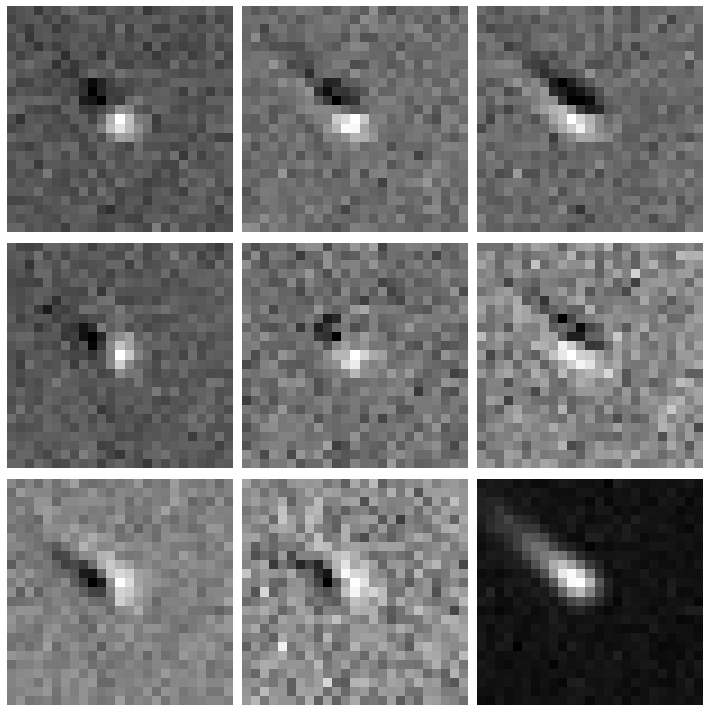

In [163]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
c = tifffile.imread('../images/train/data_I/comet_00001.tif').astype('float32')[15:40, 15:40]

idx = 0
for i in range(3):
    for j in range(3):
        subpixel = chr(idx+65)
        fpath = f'../images/train/data_{subpixel}/comet_00001.tif'
        img = tifffile.imread(fpath).astype('float32')[15:40, 15:40]

        ax[i, j].imshow(img - c, cmap='gray')
#         ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
        idx += 1
ax[2, 2].imshow(c, cmap='gray')
plt.tight_layout()

In [22]:
a = tifffile.imread('../images/train/data_A/comet_00001.tif').astype('float32')
b = tifffile.imread('../images/train/data_E/comet_00001.tif').astype('float32')

In [23]:
a.shape, b.shape

((55, 55), (55, 55))

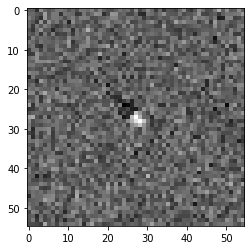

In [24]:
plt.imshow(a-b, cmap='gray');

# remove unwanted 

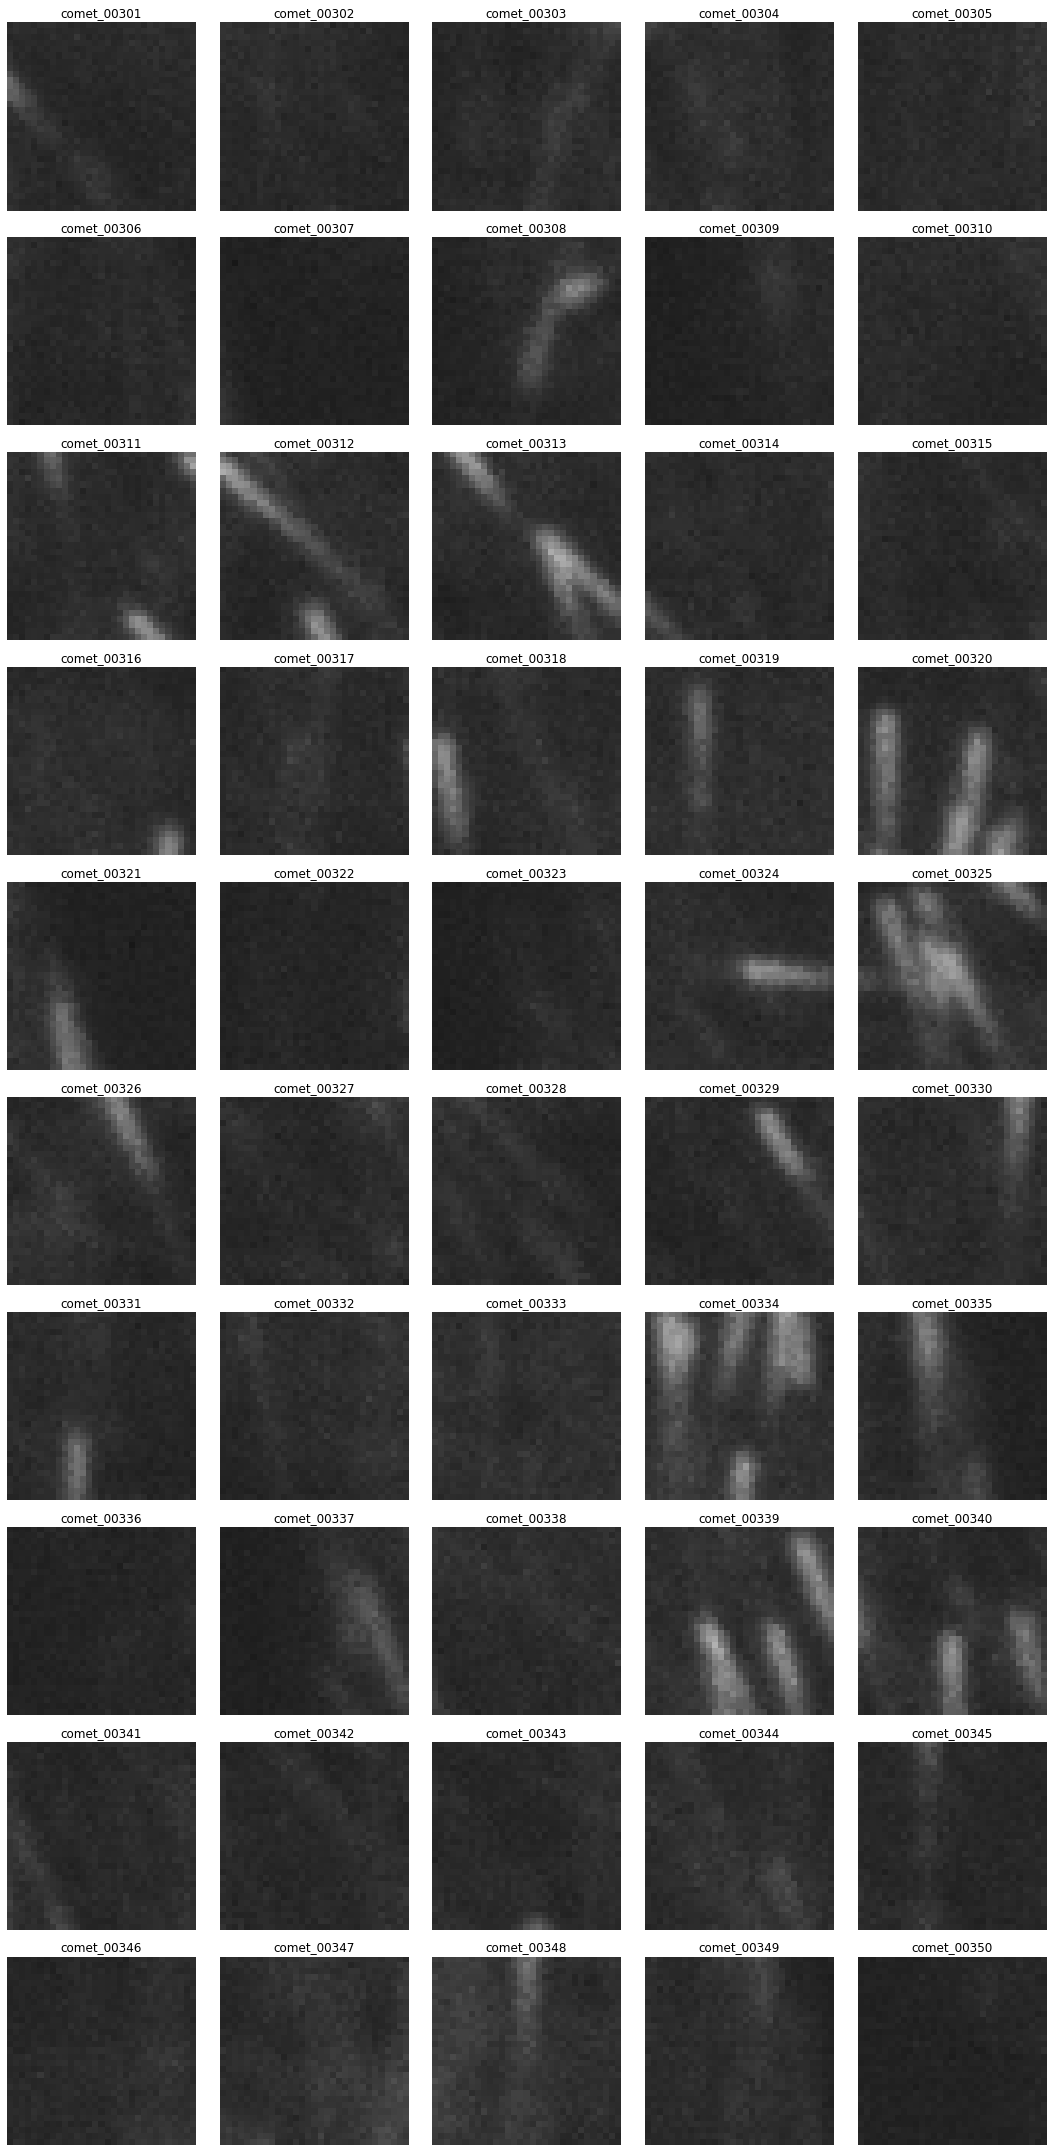

In [14]:
fnames = sorted(glob.glob('../images/test/comet_*.tif'))
fig, ax = plt.subplots(10, 5, figsize=(15, 30))

idx = 0
for i in range(10):
    for j in range(5):
        f = fnames[300+idx]
        im = tifffile.imread(f)
        ax[i, j].imshow(im, cmap='gray', vmin=0, vmax=1000)        
        ax[i, j].axis('off')
        ax[i, j].set_title(f.split('/')[-1][:-4])
        idx += 1
        
plt.tight_layout();

# Merge predictions

In [220]:
test_image = tifffile.imread('/Users/aman/Desktop/FADS/Eb1WT100mscrop1.tif')# '../../Eb1WT100mscrop1f1_10.tif')
t, h, w = test_image.shape
test_image.min(), test_image.max(), test_image.mean(), test_image.shape

(29, 912, 165.74007456914464, (601, 319, 435))

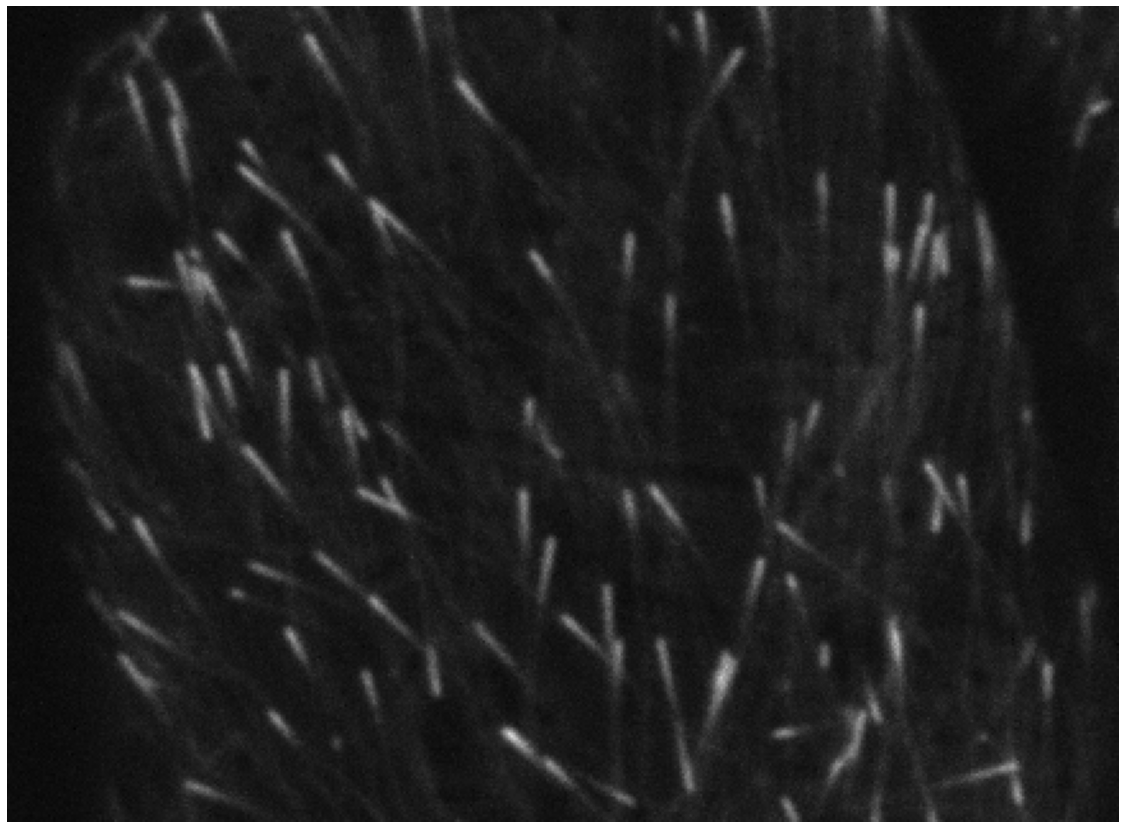

In [229]:
plt.figure(figsize=(20, 15))
plt.imshow(test_image[0], cmap='gray', vmax=1000)
plt.axis('off');